# <p style="background-color:  #C0C0C0; font-family:newtimeroman;font-size:200%;color: blue;text-align:center;border-radius:90px 20px;"><b>  Modelling Auto Scout Project  <img src="forbidden.png" style="width: 70x;" alt="Small Truck Icon" style="position: absolute; right: 5px; top: 60%; transform: translateY(-70%);"> </div> 

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.

# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com) in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.


# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

<p style="background-color: #C0C0C0; font-family: newtimeroman; font-size: 250%; color: blue; border-radius: 80px 20px; padding: 25px; text-align: center;"> <b>Data Preparation-EDA and Data Cleaning</b>
<img src="forbidden.png" style="width: 150px; vertical-align: left; margin-left: 20px; float:right;" alt="Small Truck Icon">
 <span style="display: inline-block; width: calc(80% - 20px); text-align: center;"></span> 
</p>



## 1. Import Modules, Load Data and Data Review

In [ ]:
#!pip install pandas
#!pip install numpy

#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn 
#!pip install sklearn
#pip install plotly


#!pip install missingno 
#!pip install summarytools
#!pip install ydata-profiling

# pip install inflection
# pip install skimpy

## <font color='blue'> <b>Import Library</b><font color='black'>

In [565]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
 
#%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

import scipy.stats as stats
import inflection
from skimpy import clean_columns
import missingno as msno
import plotly.graph_objects as go
from scipy.stats import skew

## <font color='blue'> <b>Read Dataset</b><font color='black'>

In [566]:
auto = pd.read_csv("final_scout_not_dummy.csv")
df1 = auto.copy()
df1

make_model body_type  price               vat            km  \
0             Audi A1    Sedans  15770    VAT deductible  56013.000000   
1             Audi A1    Sedans  14500  Price negotiable  80000.000000   
2             Audi A1    Sedans  14640    VAT deductible  83450.000000   
3             Audi A1    Sedans  14500    VAT deductible  73000.000000   
4             Audi A1    Sedans  16790    VAT deductible  16200.000000   
...               ...       ...    ...               ...           ...   
15910  Renault Espace       Van  39950    VAT deductible   1647.362609   
15911  Renault Espace       Van  39885    VAT deductible   9900.000000   
15912  Renault Espace       Van  39875    VAT deductible     15.000000   
15913  Renault Espace       Van  39700    VAT deductible     10.000000   
15914  Renault Espace       Van  40999    VAT deductible   1647.362609   

                 Type     Fuel  Gears  \
0                Used   Diesel    7.0   
1                Used  Benzine    7.0   
2                Used   Diesel    7.0   
3                Used   Diesel    6.0   
4                Used   Diesel    7.0   
...               ...      ...    ...   
15910             New   Diesel    6.0   
15911            Used  Benzine    7.0   
15912  Pre-registered   Diesel    6.0   
15913  Pre-registered   Diesel    6.0   
15914   Demonstration  Benzine    6.0   

                                     Comfort_Convenience  \
0      Air conditioning,Armrest,Automatic climate con...   
1      Air conditioning,Automatic climate control,Hil...   
2      Air conditioning,Cruise control,Electrical sid...   
3      Air suspension,Armrest,Auxiliary heating,Elect...   
4      Air conditioning,Armrest,Automatic climate con...   
...                                                  ...   
15910  Air conditioning,Automatic climate control,Cru...   
15911  Air conditioning,Automatic climate control,Cru...   
15912  Air conditioning,Armrest,Automatic climate con...   
15913  Air conditioning,Automatic climate control,Cru...   
15914  Air conditioning,Automatic climate control,Cru...   

                                     Entertainment_Media  \
0      Bluetooth,Hands-free equipment,On-board comput...   
1      Bluetooth,Hands-free equipment,On-board comput...   
2                                  MP3,On-board computer   
3      Bluetooth,CD player,Hands-free equipment,MP3,O...   
4      Bluetooth,CD player,Hands-free equipment,MP3,O...   
...                                                  ...   
15910  Bluetooth,Digital radio,Hands-free equipment,O...   
15911  Bluetooth,Digital radio,Hands-free equipment,R...   
15912  Bluetooth,Hands-free equipment,On-board comput...   
15913                  Bluetooth,Digital radio,Radio,USB   
15914                                                USB   

                                                  Extras  \
0         Alloy wheels,Catalytic Converter,Voice Control   
1      Alloy wheels,Sport seats,Sport suspension,Voic...   
2                             Alloy wheels,Voice Control   
3                 Alloy wheels,Sport seats,Voice Control   
4      Alloy wheels,Sport package,Sport suspension,Vo...   
...                                                  ...   
15910                          Alloy wheels,Touch screen   
15911            Alloy wheels,Touch screen,Voice Control   
15912                                       Alloy wheels   
15913                          Alloy wheels,Touch screen   
15914                          Alloy wheels,Touch screen   

                                         Safety_Security  age  \
0      ABS,Central door lock,Daytime running lights,D...  3.0   
1      ABS,Central door lock,Central door lock with r...  2.0   
2      ABS,Central door lock,Daytime running lights,D...  3.0   
3      ABS,Alarm system,Central door lock with remote...  3.0   
4      ABS,Central door lock,Driver-side airbag,Elect...  3.0   
...                                                  ...  ...   
15910  ABS,

In [567]:
df1.shape

(15915, 23)

In [568]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [569]:
df1.isnull()

make_model  body_type  price    vat     km   Type   Fuel  Gears  \
0           False      False  False  False  False  False  False  False   
1           False      False  False  False  False  False  False  False   
2           False      False  False  False  False  False  False  False   
3           False      False  False  False  False  False  False  False   
4           False      False  False  False  False  False  False  False   
...           ...        ...    ...    ...    ...    ...    ...    ...   
15910       False      False  False  False  False  False  False  False   
15911       False      False  False  False  False  False  False  False   
15912       False      False  False  False  False  False  False  False   
15913       False      False  False  False  False  False  False  False   
15914       False      False  False  False  False  False  False  False   

       Comfort_Convenience  Entertainment_Media  Extras  Safety_Security  \
0                    False                False   False            False   
1                    False                False   False            False   
2                    False                False   False            False   
3                    False                False   False            False   
4                    False                False   False            False   
...                    ...                  ...     ...              ...   
15910                False                False   False            False   
15911                False                False   False            False   
15912                False                False   False            False   
15913                False                False   False            False   
15914                False                False   False            False   

         age  Previous_Owners  hp_kW  Inspection_new  Paint_Type  \
0      False            False  False           False       False   
1      False            False  False           False       False   
2      False            False  False           False       False   
3      False            False  False           False       False   
4      False            False  False           False       False   
...      ...              ...    ...             ...         ...   
15910  False            False  False           False       False   
15911  False            False  False           False       False   
15912  False            False  False           False       False   
15913  False            False  False           False       False   
15914  False            False  False           False       False   

       Upholstery_type  Gearing_Type  Displacement_cc  Weight_kg  Drive_chain  \
0                False         False            False      False        False   
1                False         False            False      False        False   
2                False         False            False      False        False   
3                False         False            False      False        False   
4                False         False            False      False        False   
...                ...           ...              ...        ...          ...   
15910            False         False            False      False        False   
15911            False         False            False      False        False   
15912            False         False            False      False        False   
15913            False         False            False      False        False   
15914            False         False            False      False        False   

       cons_comb  
0          False  
1          False  
2          False  
3          False  
4          False  
...          ...  
15910      False  
15911      False  
15912      False  
15913      False  
15914      False  

[15915 rows x 23 columns]

In [570]:
df1.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

In [ ]:
import missingno as msno

In [ ]:
msno.matrix(df1);

In [ ]:
msno.bar(df1)

In [550]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

count  percentage
make_model               0         0.0
body_type                0         0.0
price                    0         0.0
vat                      0         0.0
km                       0         0.0
Type                     0         0.0
Fuel                     0         0.0
Gears                    0         0.0
Comfort_Convenience      0         0.0
Entertainment_Media      0         0.0
Extras                   0         0.0
Safety_Security          0         0.0
age                      0         0.0
Previous_Owners          0         0.0
hp_kW                    0         0.0
Inspection_new           0         0.0
Paint_Type               0         0.0
Upholstery_type          0         0.0
Gearing_Type             0         0.0
Displacement_cc          0         0.0
Weight_kg                0         0.0
Drive_chain              0         0.0
cons_comb                0         0.0

In [571]:
df1.sort_values(by="price", ascending=False)

make_model    body_type  price             vat        km  \
3648          Audi A3       Sedans  74600  VAT deductible   13000.0   
15822  Renault Espace          Van  68320  VAT deductible    4307.0   
3649          Audi A3      Compact  67600  VAT deductible   37747.0   
3587          Audi A3       Sedans  64900  VAT deductible   35000.0   
15824  Renault Espace          Van  64332  VAT deductible       1.0   
...               ...          ...    ...             ...       ...   
13766    Renault Clio       Sedans   5445  VAT deductible  123000.0   
8822       Opel Corsa      Compact   5300  VAT deductible  173021.0   
8824       Opel Corsa  Transporter   5250  VAT deductible   80000.0   
8823       Opel Corsa      Compact   4990  VAT deductible   79000.0   
8825       Opel Corsa       Sedans   4950  VAT deductible  179521.0   

                Type     Fuel  Gears  \
3648            Used  Benzine    7.0   
15822  Demonstration   Diesel    7.0   
3649            Used  Benzine    7.0   
3587            Used  Benzine    7.0   
15824            New  Benzine    6.0   
...              ...      ...    ...   
13766           Used   Diesel    5.0   
8822            Used   Diesel    5.0   
8824            Used   Diesel    5.0   
8823            Used  Benzine    5.0   
8825            Used   Diesel    5.0   

                                     Comfort_Convenience  \
3648   Air conditioning,Armrest,Automatic climate con...   
15822  Air conditioning,Armrest,Automatic climate con...   
3649   Air conditioning,Armrest,Automatic climate con...   
3587   Air conditioning,Seat ventilation,Split rear s...   
15824  Air conditioning,Armrest,Automatic climate con...   
...                                                  ...   
13766                                   Air conditioning   
8822   Air conditioning,Electrical side mirrors,Navig...   
8824   Air conditioning,Electrical side mirrors,Multi...   
8823   Air conditioning,Cruise control,Electrical sid...   
8825   Air conditioning,Automatic climate control,Ele...   

                                     Entertainment_Media  \
3648                   CD player,On-board computer,Radio   
15822  Bluetooth,CD player,Digital radio,Hands-free e...   
3649                   CD player,On-board computer,Radio   
3587                                               Radio   
15824           Digital radio,Hands-free equipment,Radio   
...                                                  ...   
13766                                              Radio   
8822                         CD player,On-board computer   
8824                                 Bluetooth,Radio,USB   
8823   Bluetooth,Hands-free equipment,On-board comput...   
8825       Bluetooth,CD player,MP3,On-board computer,USB   

                                                  Extras  \
3648           Alloy wheels,Sport seats,Sport suspension   
15822                             Alloy wheels,Roof rack   
3649   Alloy wheels,Roof rack,Sport seats,Sport suspe...   
3587                                        Alloy wheels   
15824                         Alloy wheels,Voice Control   
...                                                  ...   
13766                                       Alloy wheels   
8822                                        Alloy wheels   
8824                    Alloy wheels,Catalytic Converter   
8823                           Alloy wheels,Touch screen   
8825                                        Alloy wheels   

                                         Safety_Security  age  \
3648   ABS,Alarm system,Central door lock,Driver-side...  1.0   
15822  ABS,Adaptive Cruise Control,Adaptive headlight...  0.0   
3649   ABS,Alarm system,Central door lock,Driver-side...  2.0   
3587   Adaptive Cruise Control,Alarm system,Central d...  1.0   
15824  ABS,Alarm system,Blind spot monitor,Daytime ru...  0.0   
...                                                  ...  ...   
13766              Central door lock with remote control  3

In [572]:
df1.describe().T

count          mean           std     min      25%  \
price            15915.0  18024.380584   7381.679318  4950.0  12850.0   
km               15915.0  32089.995708  36977.214964     0.0   1920.5   
Gears            15915.0      5.937355      0.704772     5.0      5.0   
age              15915.0      1.389695      1.121306     0.0      0.0   
Previous_Owners  15915.0      1.042853      0.339178     0.0      1.0   
hp_kW            15915.0     88.499340     26.674341    40.0     66.0   
Inspection_new   15915.0      0.247063      0.431317     0.0      0.0   
Displacement_cc  15915.0   1428.661891    275.804272   890.0   1229.0   
Weight_kg        15915.0   1337.700534    199.682385   840.0   1165.0   
cons_comb        15915.0      4.832124      0.867530     3.0      4.1   

                     50%      75%       max  
price            16900.0  21900.0   74600.0  
km               20413.0  46900.0  317000.0  
Gears                6.0      6.0       8.0  
age                  1.0      2.0       3.0  
Previous_Owners      1.0      1.0       4.0  
hp_kW               85.0    103.0     294.0  
Inspection_new       0.0      0.0       1.0  
Displacement_cc   1461.0   1598.0    2967.0  
Weight_kg         1295.0   1472.0    2471.0  
cons_comb            4.8      5.4       9.1

In [573]:
df1.describe(include="object").T

count unique  \
make_model           15915      9   
body_type            15915      8   
vat                  15915      2   
Type                 15915      5   
Fuel                 15915      4   
Comfort_Convenience  15915   6196   
Entertainment_Media  15915    346   
Extras               15915    659   
Safety_Security      15915   4442   
Paint_Type           15915      3   
Upholstery_type      15915      2   
Gearing_Type         15915      3   
Drive_chain          15915      3   

                                                                   top   freq  
make_model                                                     Audi A3   3097  
body_type                                                       Sedans   8004  
vat                                                     VAT deductible  15044  
Type                                                              Used  11095  
Fuel                                                           Benzine   8548  
Comfort_Convenience  Air conditioning,Electrical side mirrors,Hill ...    388  
Entertainment_Media  Bluetooth,Hands-free equipment,On-board comput...   1737  
Extras                                                    Alloy wheels   5785  
Safety_Security      ABS,Central door lock,Daytime running lights,D...    729  
Paint_Type                                                    Metallic  15246  
Upholstery_type                                                  Cloth  12234  
Gearing_Type                                                    Manual   8149  
Drive_chain                                                      front  15707

In [574]:
df1.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [576]:
df1 = clean_columns(df1)
df1.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'type', 'fuel',
       'gears', 'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'age', 'previous_owners', 'hp_k_w', 'inspection_new',
       'paint_type', 'upholstery_type', 'gearing_type', 'displacement_cc',
       'weight_kg', 'drive_chain', 'cons_comb'],
      dtype='object')

**---Alternative Methods for change columns names**

In [48]:
#df.rename(columns={ '    ': '    ',
                  #  'make_model': 'model',,... }, inplace=True)

In [49]:
#df.columns

In [50]:
#Second method
#df.columns = [inflection.camelize(column, False) for column in df.columns]
#df.columns

In [51]:
#df.columns = [inflection.underscore(column) for column in df.columns]
#df.columns

In [52]:
#df.columns = [inflection.dasherize(inflection.underscore(column)).lower() for column in df.columns]
#df.columns

In [53]:
#df.columns = [inflection.humanize(inflection.underscore(column)) for column in df.columns]
#df.columns

In [54]:
#df.columns = [inflection.titleize(column).replace(' ', '') for column in df.columns]
#df.columns

In [55]:
#for i in df.columns:
    #print(i)

In [56]:
#missing_count = df.isnull().sum()
#value_count = df.isnull().count()
#missing_percentage = round(missing_count / value_count * 100, 2)
#missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
#missing_df


## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

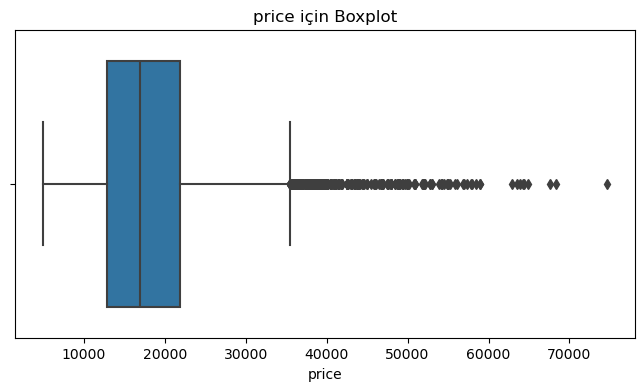

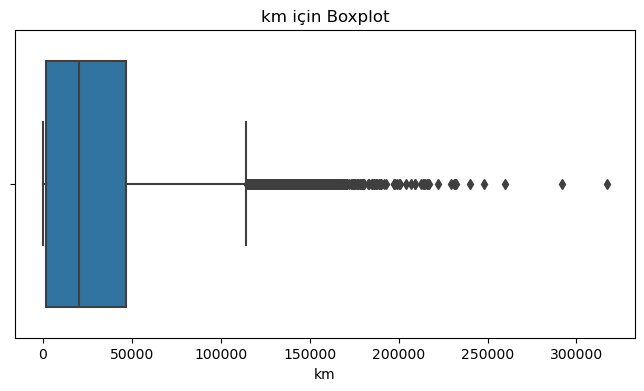

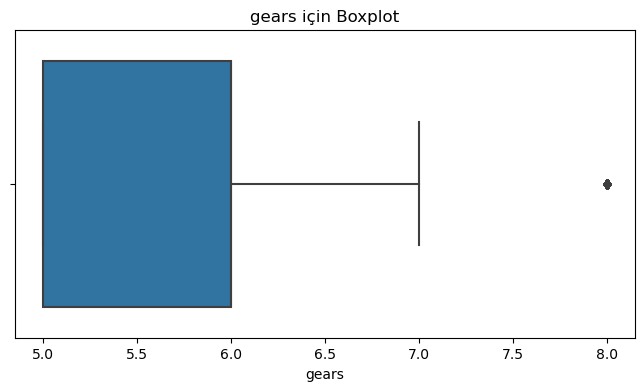

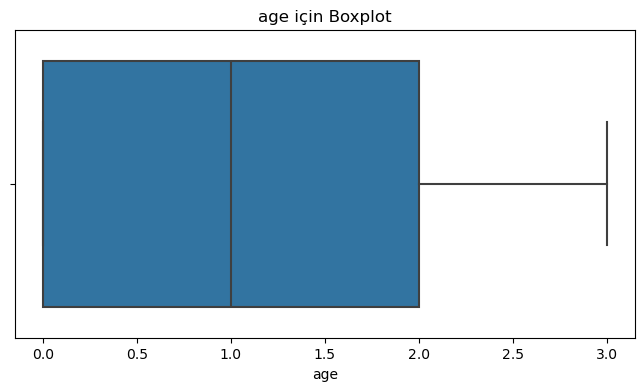

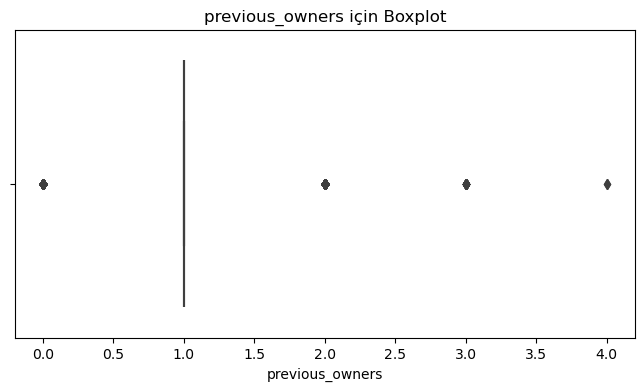

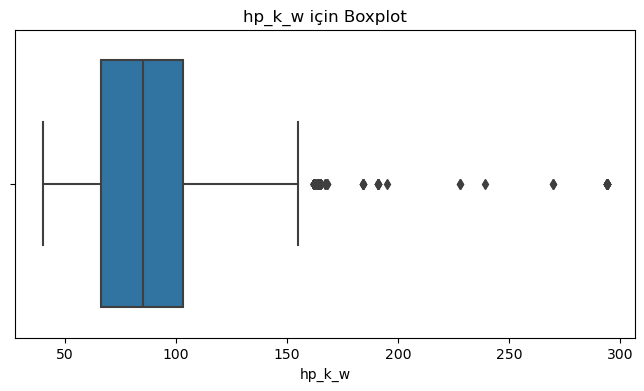

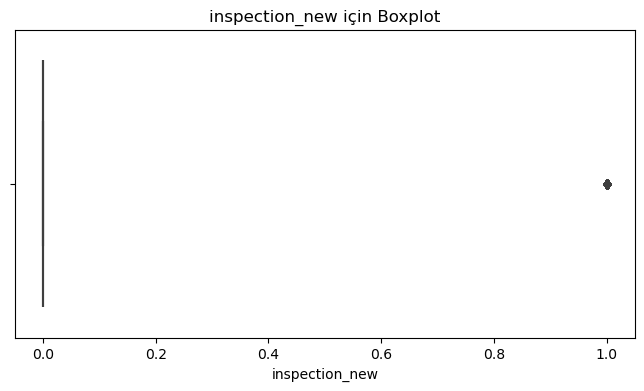

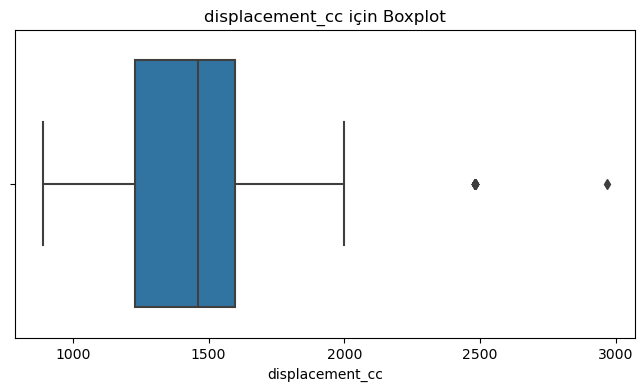

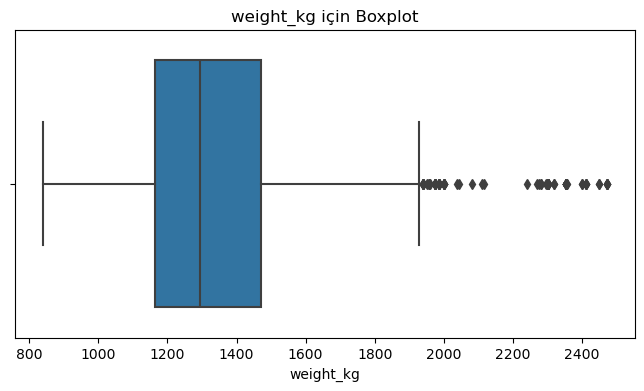

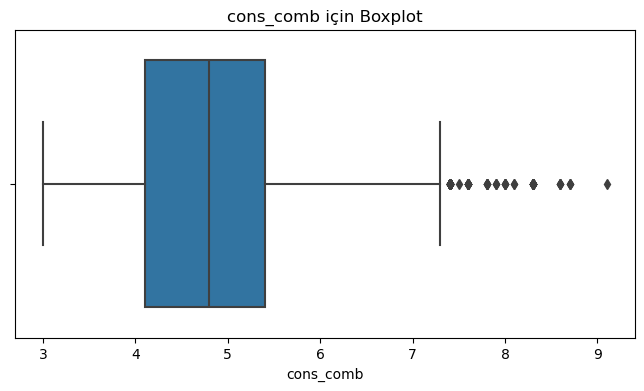

In [577]:
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df1[col])
    plt.title(f"{col} için Boxplot")
    plt.show()

In [578]:
df1.describe().T

count          mean           std     min      25%  \
price            15915.0  18024.380584   7381.679318  4950.0  12850.0   
km               15915.0  32089.995708  36977.214964     0.0   1920.5   
gears            15915.0      5.937355      0.704772     5.0      5.0   
age              15915.0      1.389695      1.121306     0.0      0.0   
previous_owners  15915.0      1.042853      0.339178     0.0      1.0   
hp_k_w           15915.0     88.499340     26.674341    40.0     66.0   
inspection_new   15915.0      0.247063      0.431317     0.0      0.0   
displacement_cc  15915.0   1428.661891    275.804272   890.0   1229.0   
weight_kg        15915.0   1337.700534    199.682385   840.0   1165.0   
cons_comb        15915.0      4.832124      0.867530     3.0      4.1   

                     50%      75%       max  
price            16900.0  21900.0   74600.0  
km               20413.0  46900.0  317000.0  
gears                6.0      6.0       8.0  
age                  1.0      2.0       3.0  
previous_owners      1.0      1.0       4.0  
hp_k_w              85.0    103.0     294.0  
inspection_new       0.0      0.0       1.0  
displacement_cc   1461.0   1598.0    2967.0  
weight_kg         1295.0   1472.0    2471.0  
cons_comb            4.8      5.4       9.1

In [581]:
def remove_all_outliers_except(df1, except_columns):
    cleaned_df = df1.copy()
    for column in df1.select_dtypes(include=['float64', 'int64']).columns:
        if column not in except_columns:
            Q1 = df1[column].quantile(0.25)
            Q3 = df1[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Aykırı olmayan değerleri filtrele
            cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]
        
    return cleaned_df

# 'Inspection_new' ve 'Previous_Owners' sütunları hariç tüm DataFrame üzerinde aykırı değerleri temizleme
except_columns = ['inspection_new', 'previous_owners']
df= remove_all_outliers_except(df1, except_columns)

# Temizlenmiş veri setinin temel istatistiklerini göster
df.describe().T


count          mean           std     min      25%  \
price            14283.0  17323.612546   6014.527020  4990.0  12788.0   
km               14283.0  28051.162758  29045.724496     0.0   2348.5   
gears            14283.0      5.889659      0.676702     5.0      5.0   
age              14283.0      1.365749      1.096561     0.0      0.0   
previous_owners  14283.0      1.045929      0.348228     0.0      1.0   
hp_k_w           14283.0     84.648883     21.880738    40.0     66.0   
inspection_new   14283.0      0.249457      0.432714     0.0      0.0   
displacement_cc  14283.0   1394.938808    261.189236   890.0   1197.0   
weight_kg        14283.0   1316.703914    181.804671   840.0   1163.0   
cons_comb        14283.0      4.778373      0.800280     3.0      4.1   

                     50%      75%       max  
price            16790.0  21490.0   35450.0  
km               20000.0  42627.5  114300.0  
gears                6.0      6.0       7.0  
age                  1.0      2.0       3.0  
previous_owners      1.0      1.0       4.0  
hp_k_w              85.0    100.0     150.0  
inspection_new       0.0      0.0       1.0  
displacement_cc   1422.0   1598.0    2000.0  
weight_kg         1275.0   1425.0    1929.0  
cons_comb            4.8      5.4       7.3

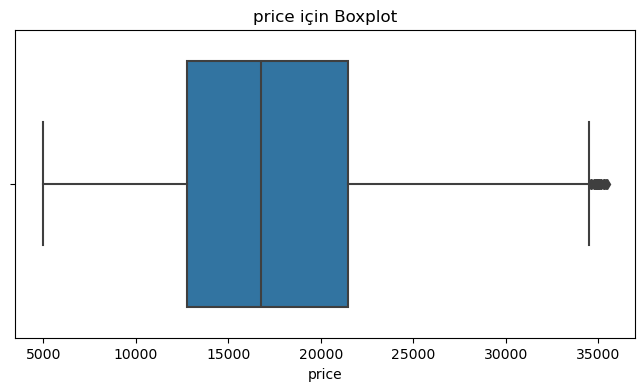

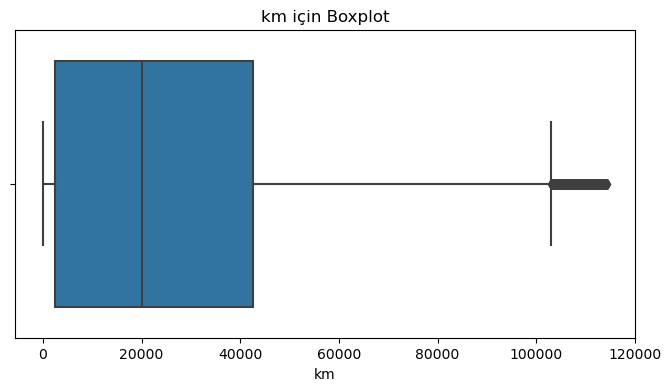

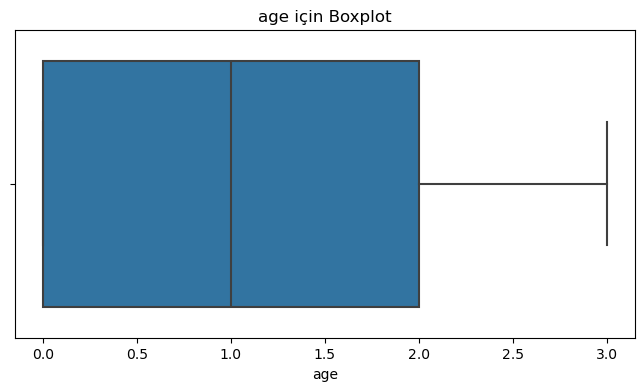

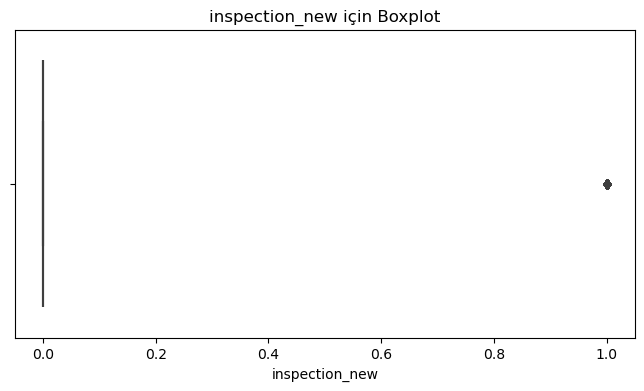

In [582]:
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} için Boxplot")
    plt.show()

def remove_outliers_specific_columns(df, columns):
    cleaned_df = df.copy()
    for column in columns:
        if column in df.columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Aykırı olmayan değerleri filtrele
            cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]
    return cleaned_df

specific_columns = ['price', 'km']  
cleaned_df_specific = remove_outliers_specific_columns(df, specific_columns)

cleaned_df_specific.describe().T


def remove_all_outliers(df):
    cleaned_df = df.copy()
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]
        
    return cleaned_df
df2 = remove_all_outliers(df)
df2.describe().T


def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

##### Örnek olarak 'price' sütunu için aykırı değerleri temizleme
df1= remove_outliers(df, 'price')
df1.describe().T

In [583]:
df.describe().T

count          mean           std     min      25%  \
price            14283.0  17323.612546   6014.527020  4990.0  12788.0   
km               14283.0  28051.162758  29045.724496     0.0   2348.5   
gears            14283.0      5.889659      0.676702     5.0      5.0   
age              14283.0      1.365749      1.096561     0.0      0.0   
previous_owners  14283.0      1.045929      0.348228     0.0      1.0   
hp_k_w           14283.0     84.648883     21.880738    40.0     66.0   
inspection_new   14283.0      0.249457      0.432714     0.0      0.0   
displacement_cc  14283.0   1394.938808    261.189236   890.0   1197.0   
weight_kg        14283.0   1316.703914    181.804671   840.0   1163.0   
cons_comb        14283.0      4.778373      0.800280     3.0      4.1   

                     50%      75%       max  
price            16790.0  21490.0   35450.0  
km               20000.0  42627.5  114300.0  
gears                6.0      6.0       7.0  
age                  1.0      2.0       3.0  
previous_owners      1.0      1.0       4.0  
hp_k_w              85.0    100.0     150.0  
inspection_new       0.0      0.0       1.0  
displacement_cc   1422.0   1598.0    2000.0  
weight_kg         1275.0   1425.0    1929.0  
cons_comb            4.8      5.4       7.3

In [59]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
# Note: For columns with a large number of unique values, printing all values might not be practical.
    # Therefore, if there are more than 10 unique values, only the first 10 are displayed.
   
    print(f"\033[1m\033[91mColumn:\033[0m \033[1m\033[94m{column}\033[0m")
    print(f"\033[1m\033[92mNumber of Unique Values:\033[93m {unique_count}")
    
    if unique_count <= 10:
        print(f"\033[1mUnique Values:\033[0m {unique_values}\n")
    else:
        print(f"\033[95mFirst 10 Unique Values:\033[0m {unique_values[:10]}")
        print(f"... and {unique_count - 10} more unique values\n")

Column: make_model
Number of Unique Values: 9
Unique Values: ['Audi A1' 'Audi A2' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Duster' 'Renault Espace']

Column: body_type
Number of Unique Values: 8
Unique Values: ['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Off-Road' 'Convertible'
 'Transporter']

Column: price
Number of Unique Values: 2952
First 10 Unique Values: [15770 14500 14640 16790 15090 16422 14480 16700 17990 18500]
... and 2942 more unique values

Column: vat
Number of Unique Values: 2
Unique Values: ['VAT deductible' 'Price negotiable']

Column: km
Number of Unique Values: 6691
First 10 Unique Values: [56013. 80000. 83450. 73000. 16200. 63668. 62111. 14986. 57000. 16103.]
... and 6681 more unique values

Column: type
Number of Unique Values: 5
Unique Values: ['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']

Column: fuel
Number of Unique Values: 4
Unique Values: ['Diesel' 'Benzine' 'LPG/CNG' 'Electric']

Column: gears
Num

In [511]:
unique_make_models = df['make_model'].unique()

for make_model in unique_make_models:
    fuel_types = df[df['make_model'] == make_model]['fuel'].unique()
    print(f"The fuel type(s) for {make_model}: {fuel_types}")

The fuel type(s) for Audi A1: ['Diesel' 'Benzine']
The fuel type(s) for Audi A2: ['Diesel']
The fuel type(s) for Audi A3: ['Benzine' 'Diesel' 'LPG/CNG' 'Electric']
The fuel type(s) for Opel Astra: ['Diesel' 'Benzine' 'LPG/CNG']
The fuel type(s) for Opel Corsa: ['Benzine' 'LPG/CNG' 'Diesel']
The fuel type(s) for Opel Insignia: ['Diesel' 'Benzine']
The fuel type(s) for Renault Clio: ['Diesel' 'Benzine' 'Electric' 'LPG/CNG']
The fuel type(s) for Renault Duster: ['Benzine']
The fuel type(s) for Renault Espace: ['Diesel' 'Benzine']


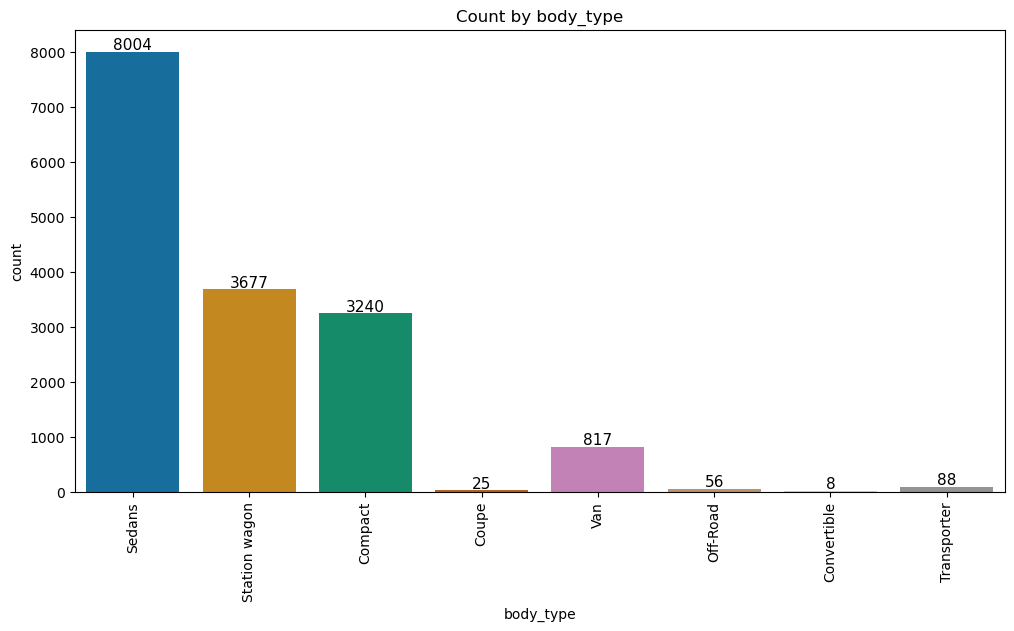

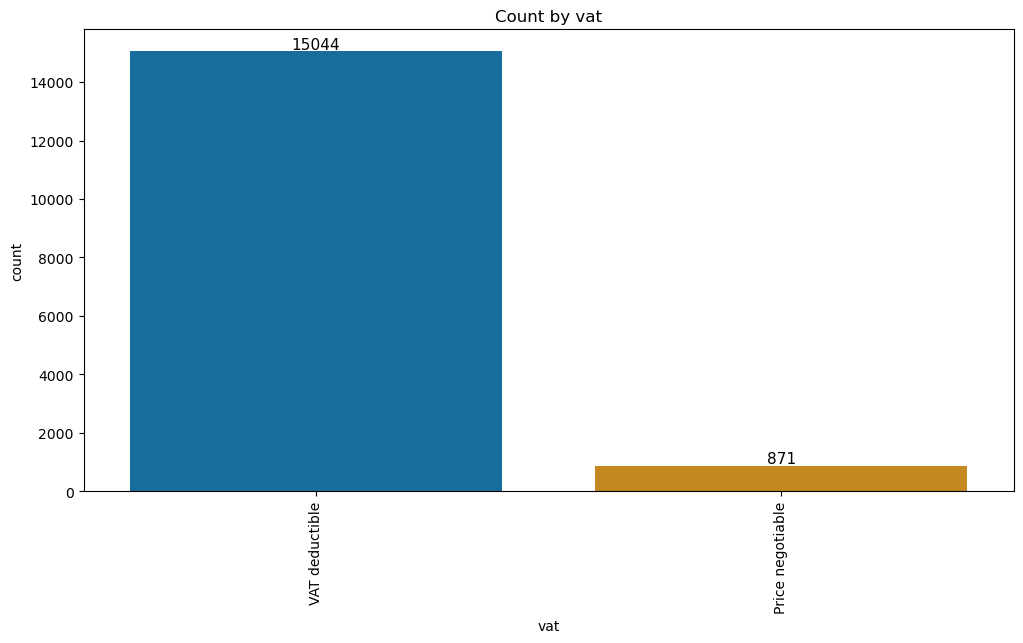

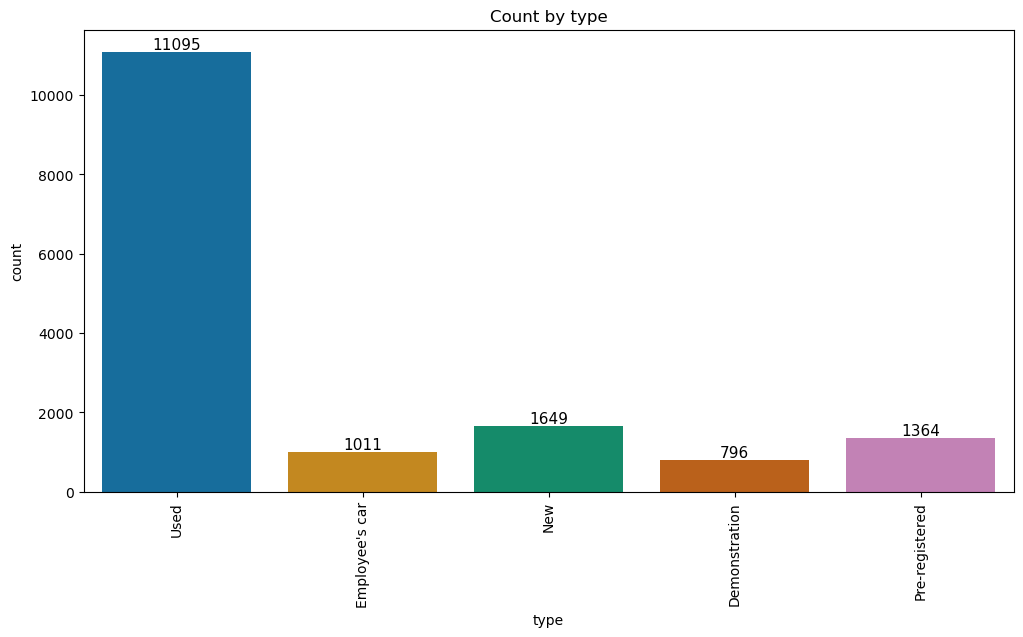

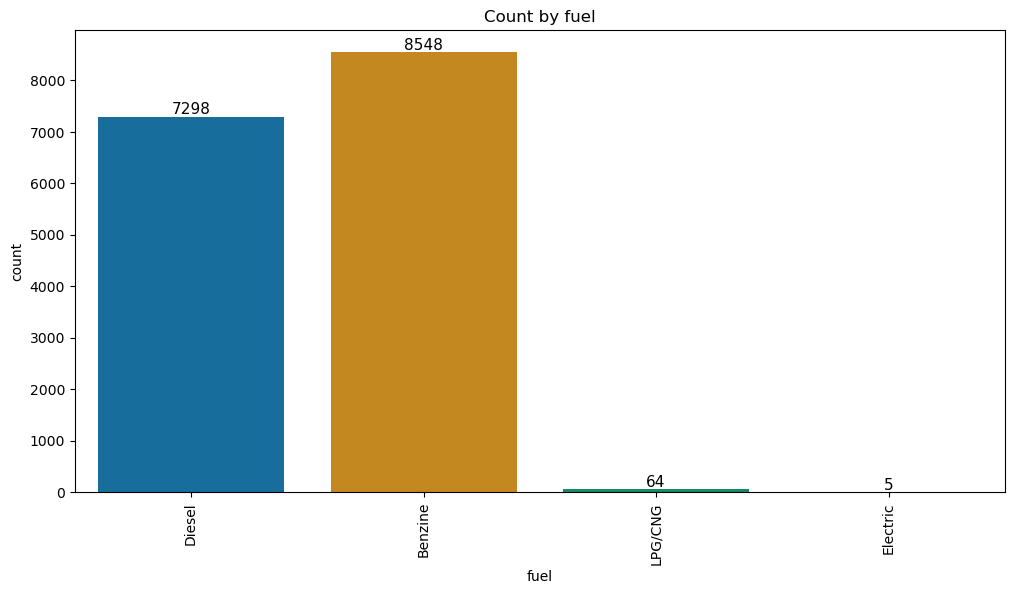

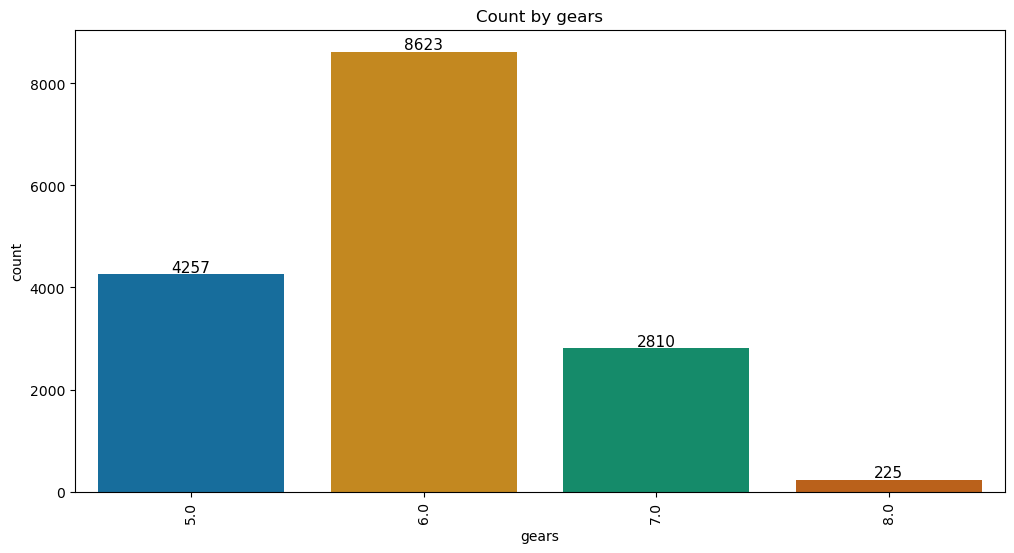

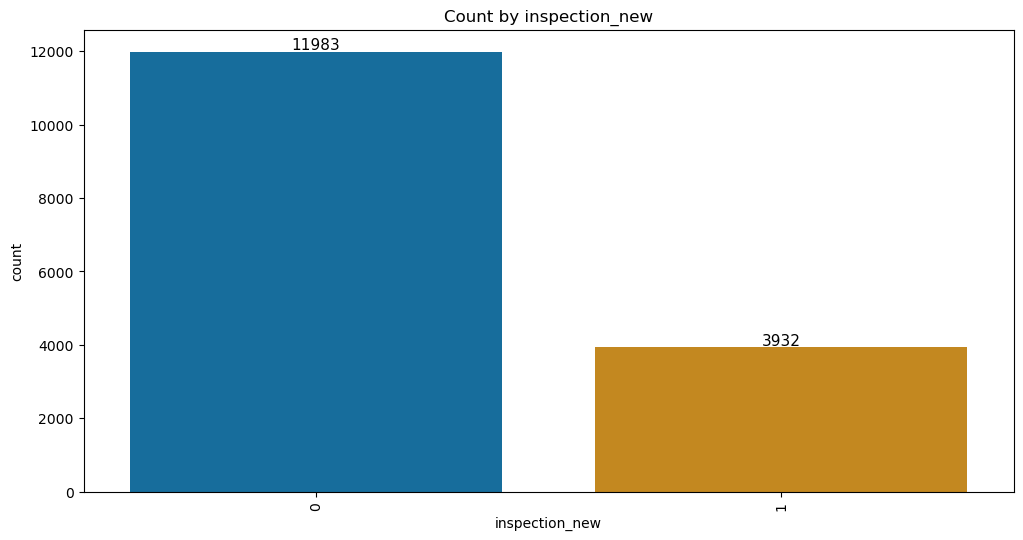

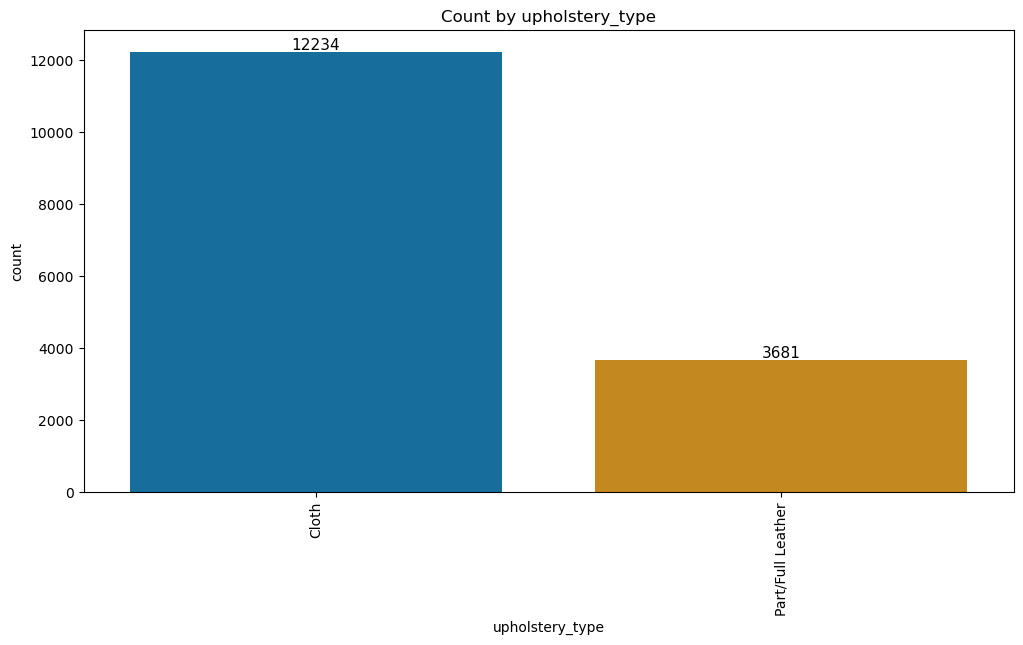

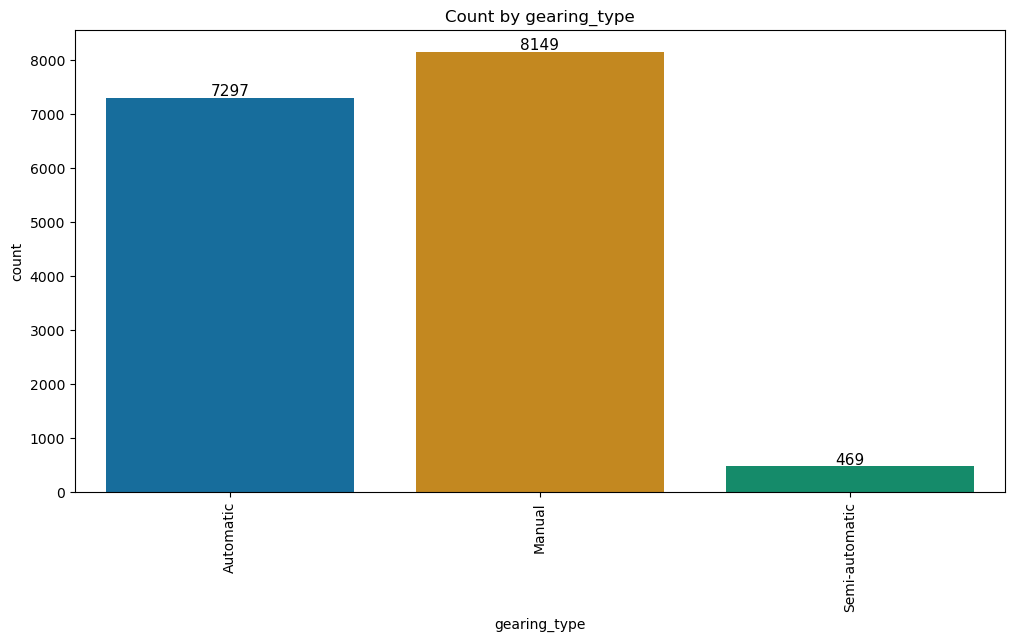

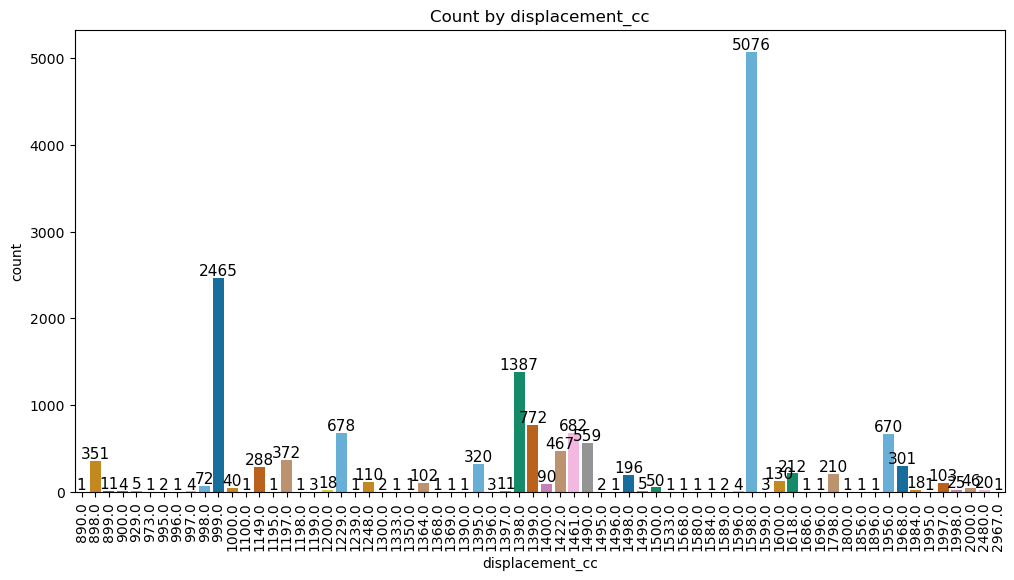

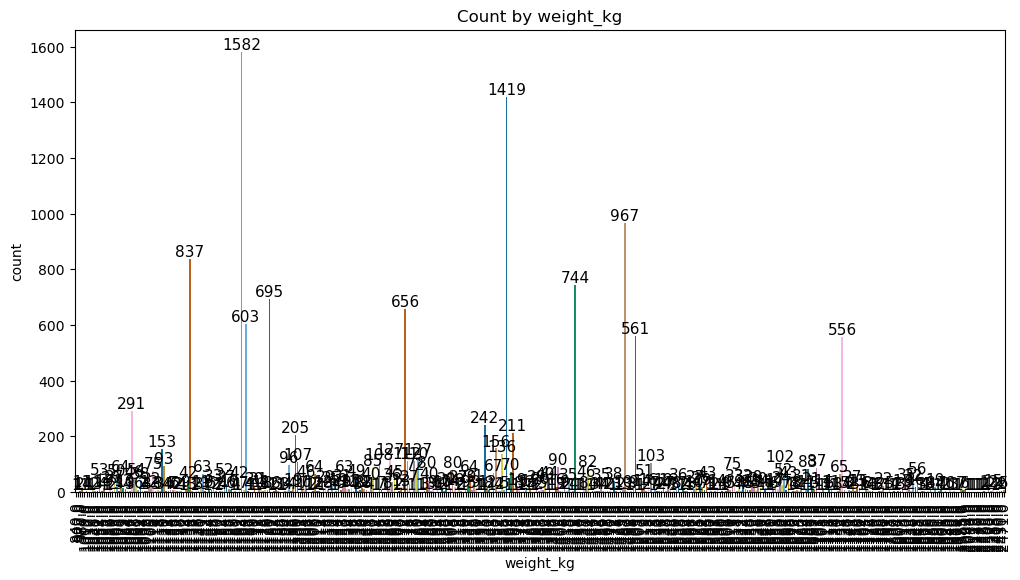

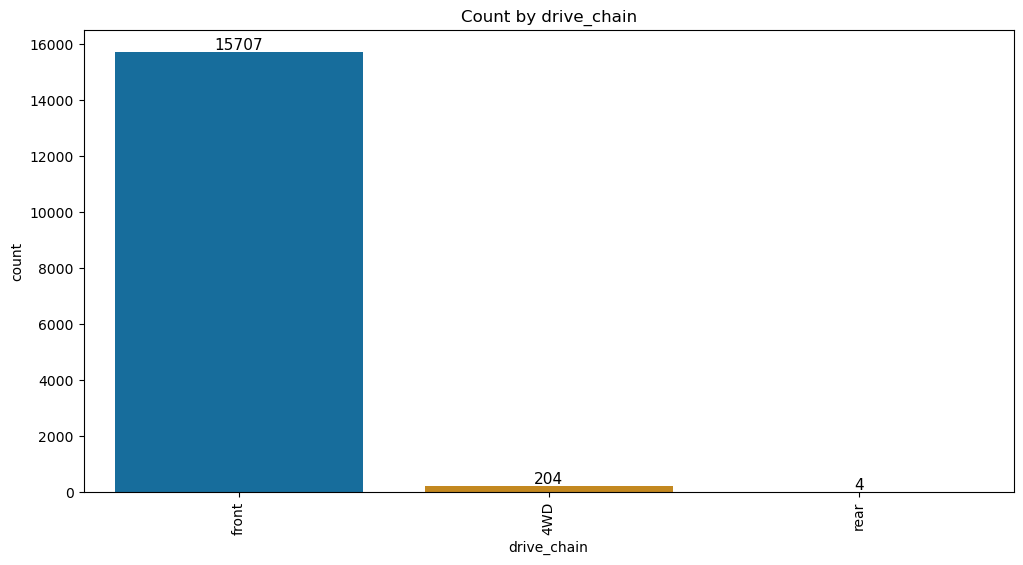

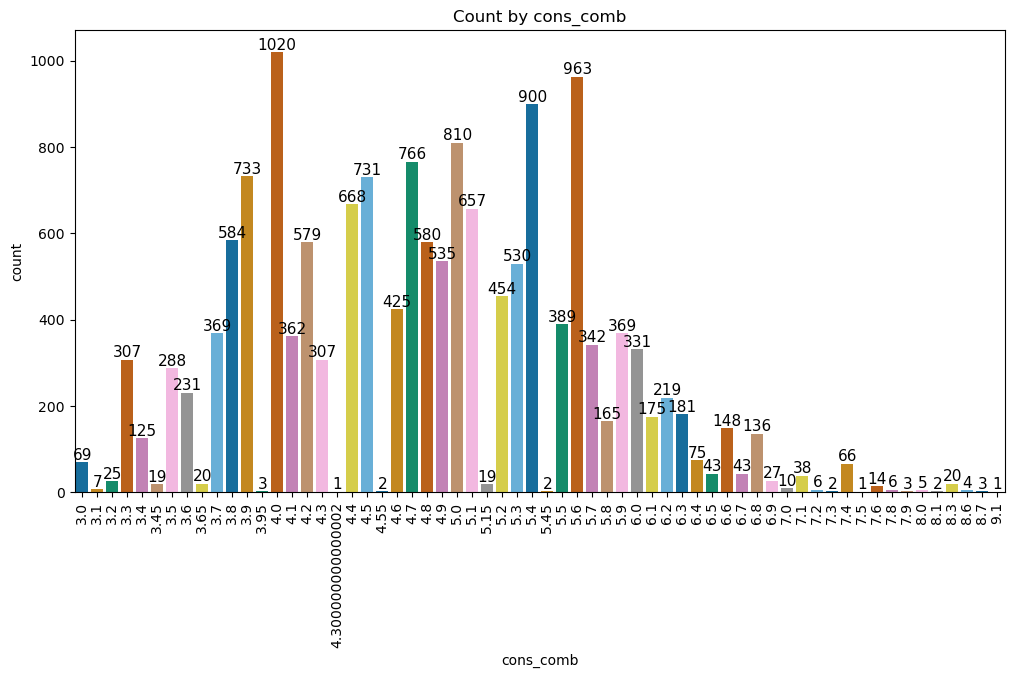

In [512]:

max_unique_values = 500

for col in df.columns:
    if col in df and df[col].nunique() <= max_unique_values:
        plt.figure(figsize=(12, 6))
        ax = sns.countplot(x=col, data= df, palette="colorblind")
        
        plt.title(f"Count by {col}")
        plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
        
        # Adding counts above each bar
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                        textcoords='offset points')
        
        plt.show()

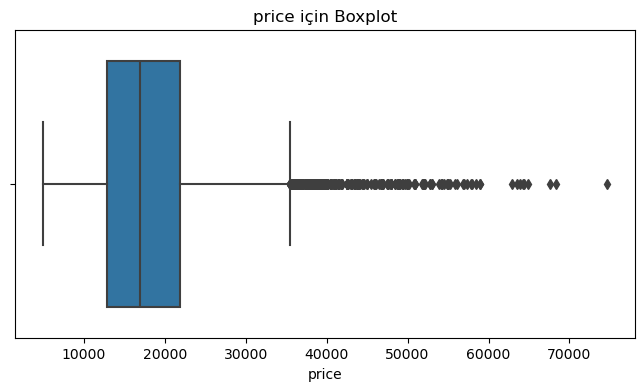

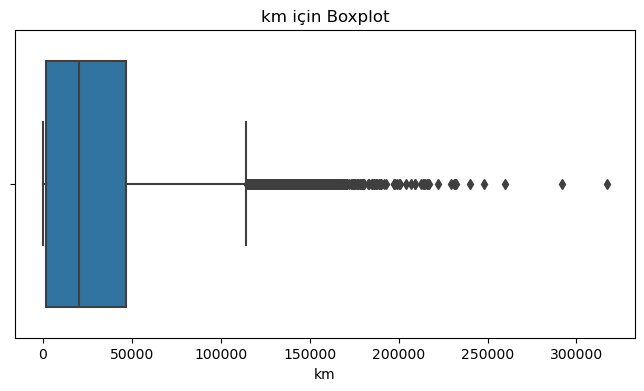

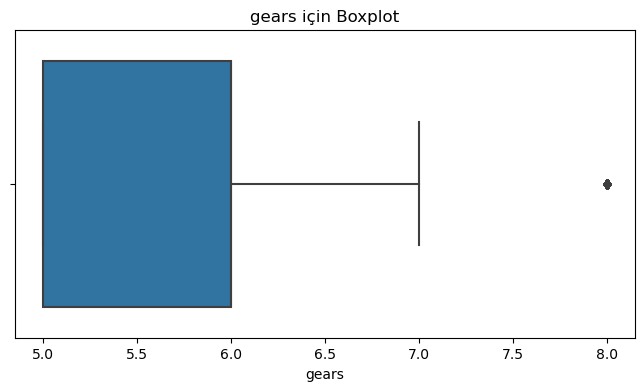

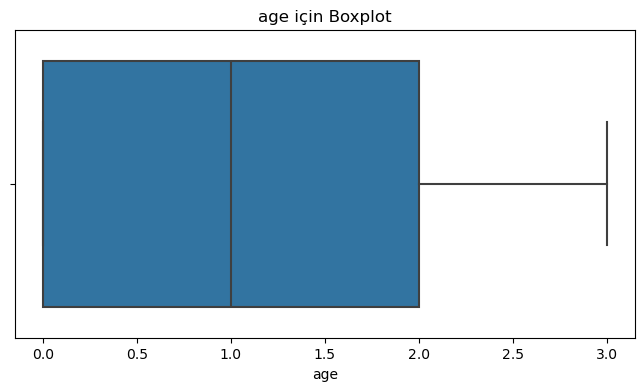

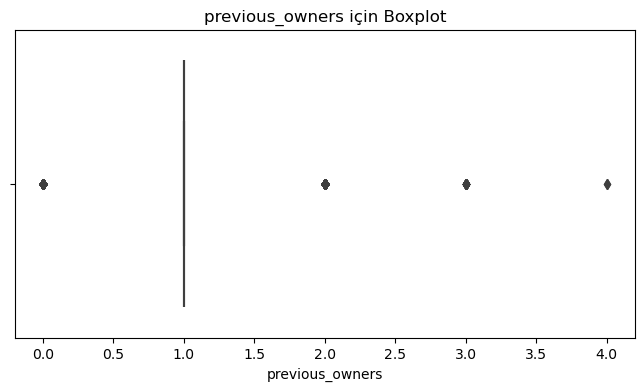

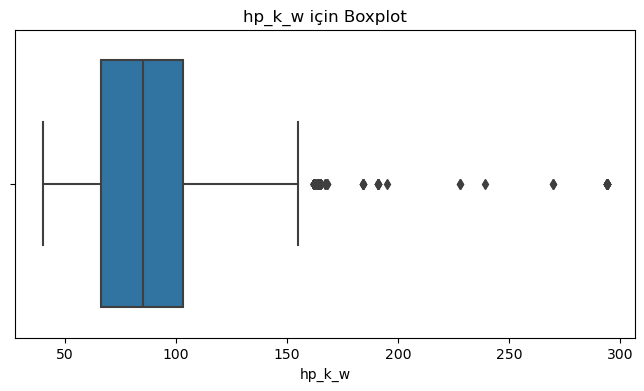

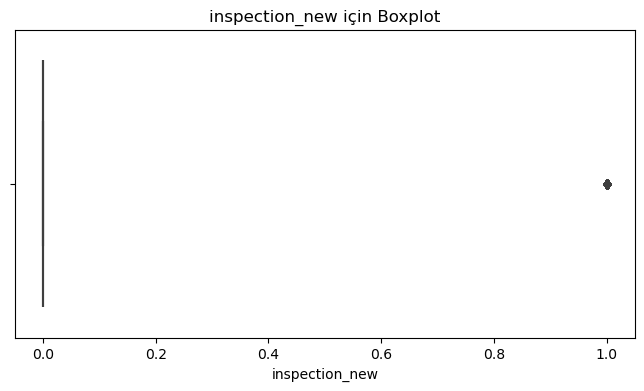

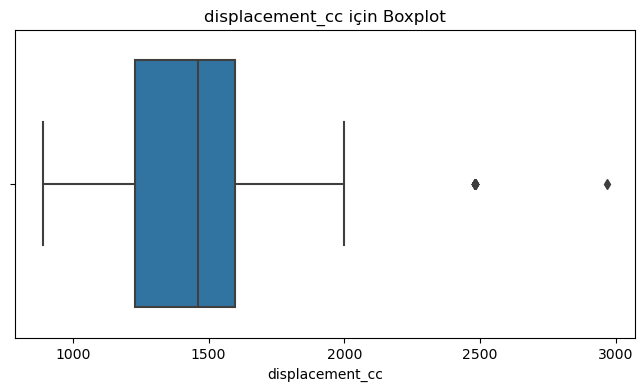

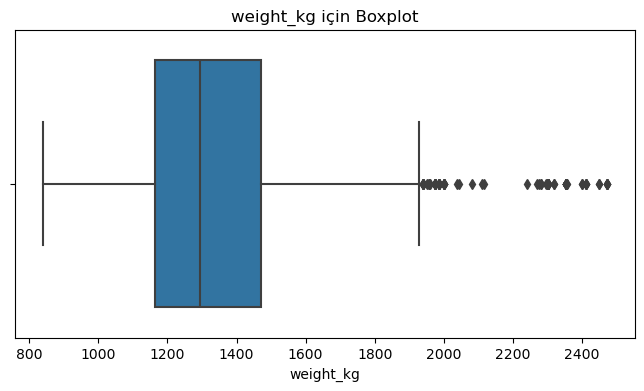

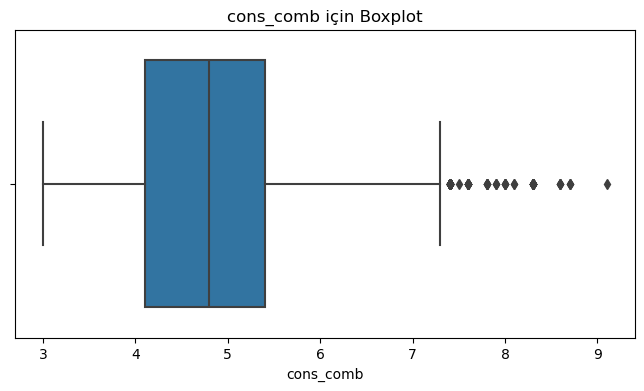

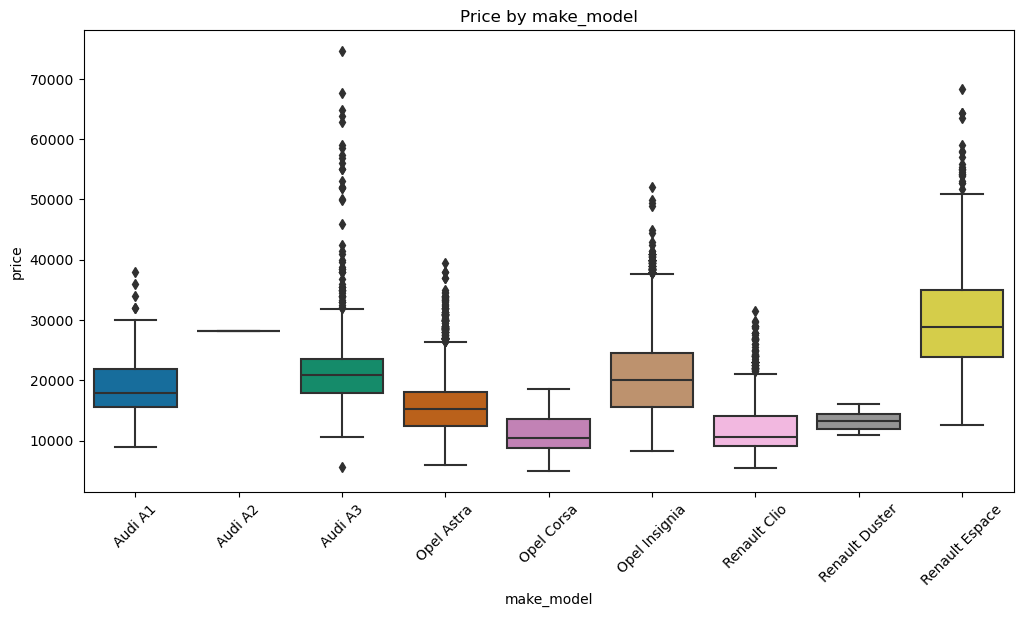

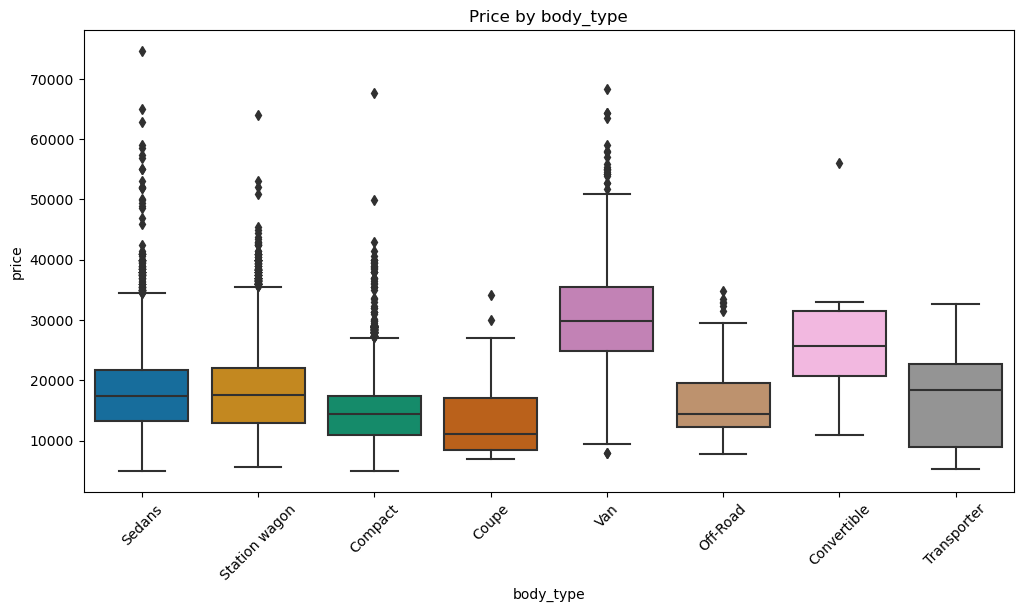

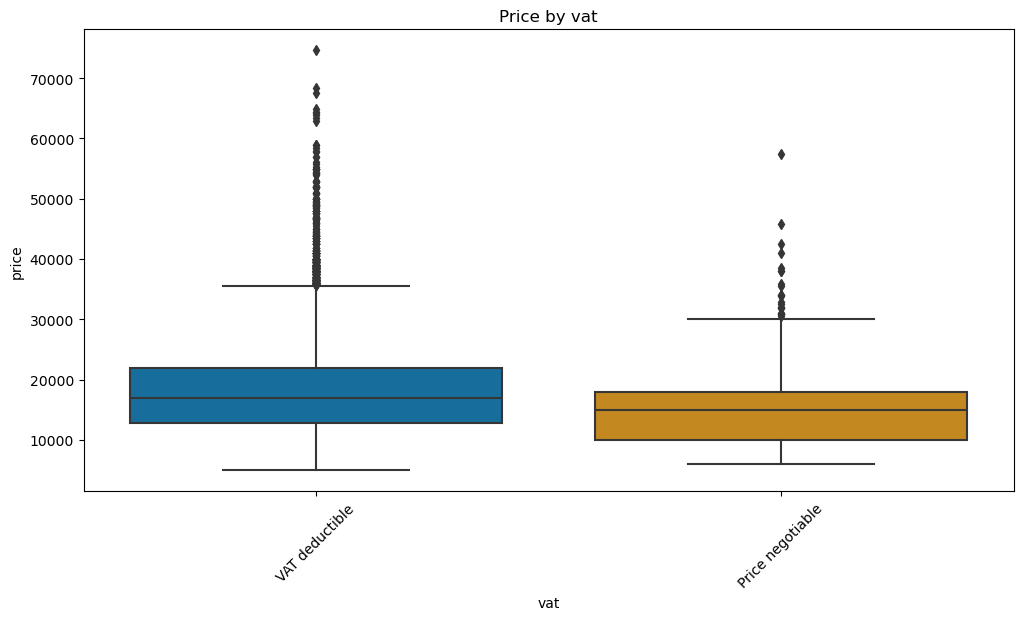

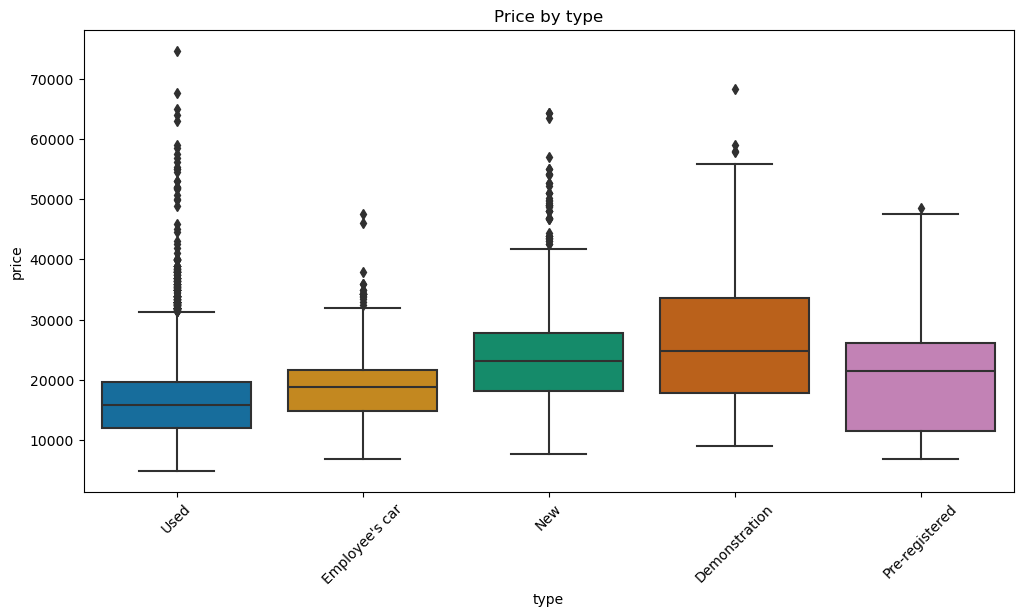

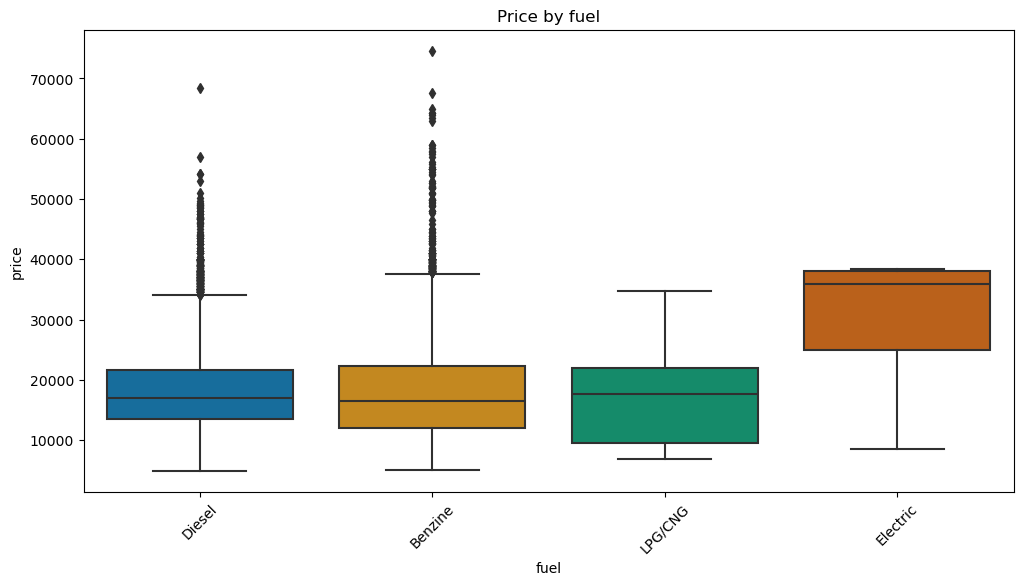

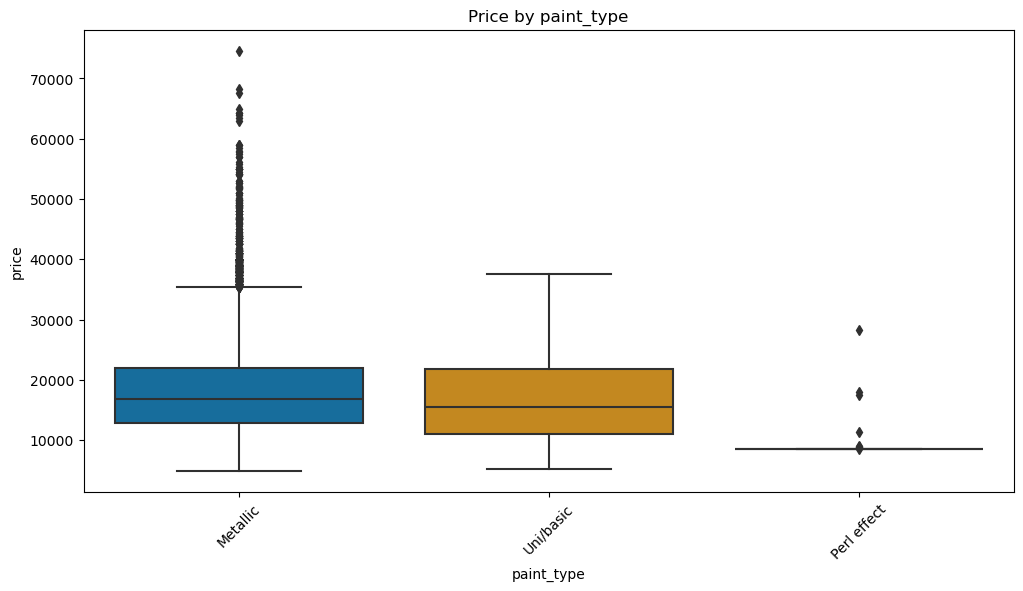

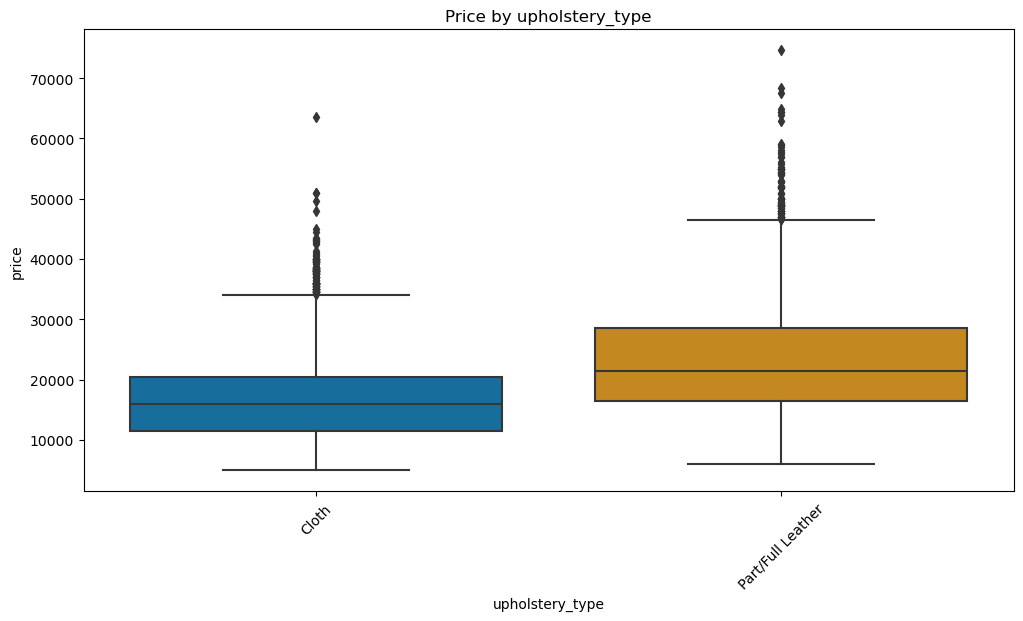

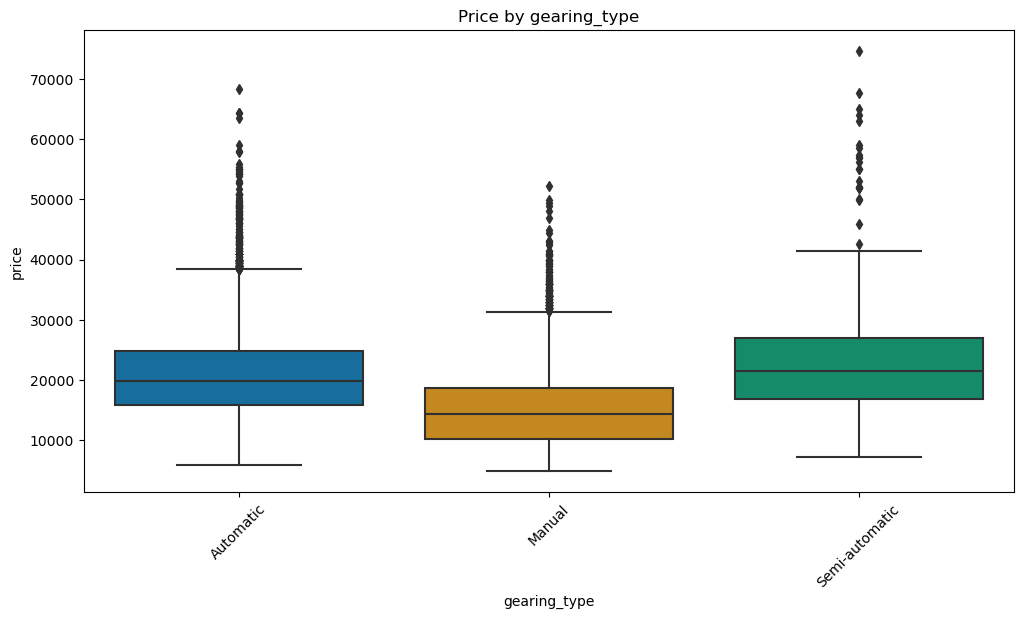

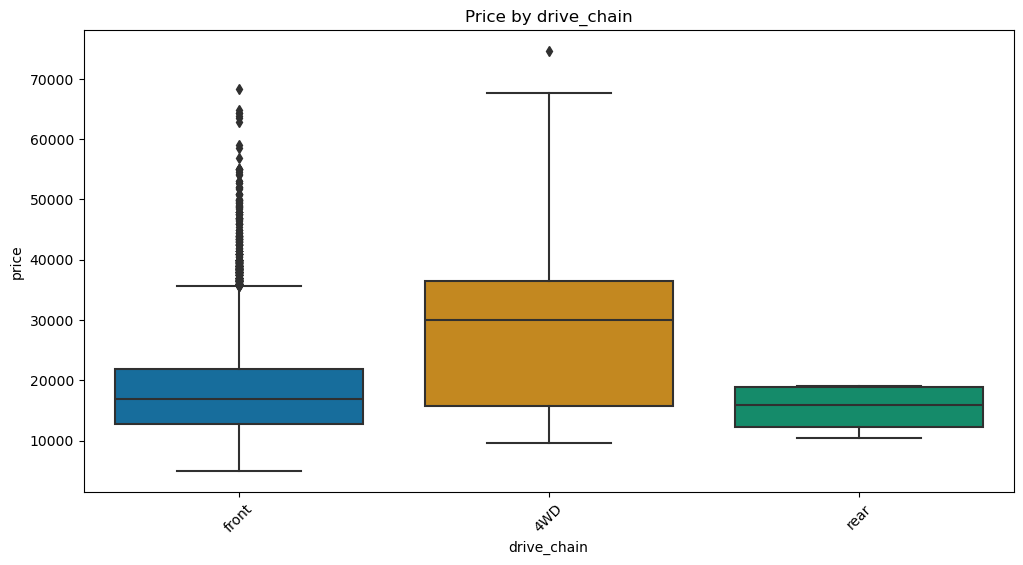

In [62]:
exclude_columns =  df.select_dtypes(include=['number']).columns.tolist()

# Optionally, you might want to limit the number of unique values for categorical plots
max_unique_values = 300

for col in df.columns:
    # Skip over the excluded columns and columns with too many unique values
    if col not in exclude_columns and df[col].nunique() <= max_unique_values:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=col, y="price", data=df, palette="colorblind")
        
        plt.title(f"Price by {col}")
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show()

In [63]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col_name in numeric_cols:
    
    column_skewness = skew(df[col_name].dropna())
    print(f"{col_name}: {column_skewness}")

price: 1.2360529000082296
km: 1.6228088098444602
gears: 0.3307396684856817
age: 0.17569299666477714
previous_owners: 1.0748027406037113
hp_k_w: 1.2924047688801539
inspection_new: 1.1728981260355587
displacement_cc: -0.09685865489204284
weight_kg: 1.08233118507631
cons_comb: 0.41886398435571004


**Since each of these values is close to +1, we can say that the distributions are slightly to moderately right-skewed. This may necessitate the application of some data transformations or normalization techniques during the data analysis and modeling process.**

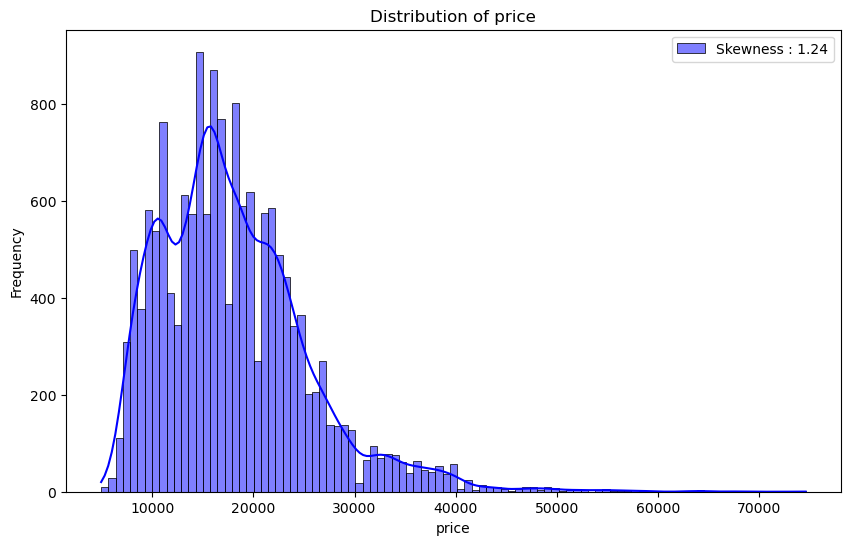

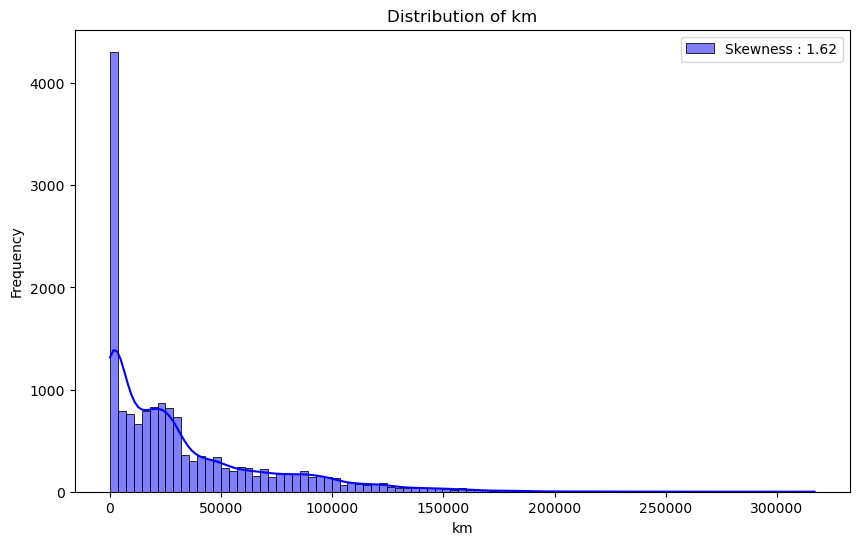

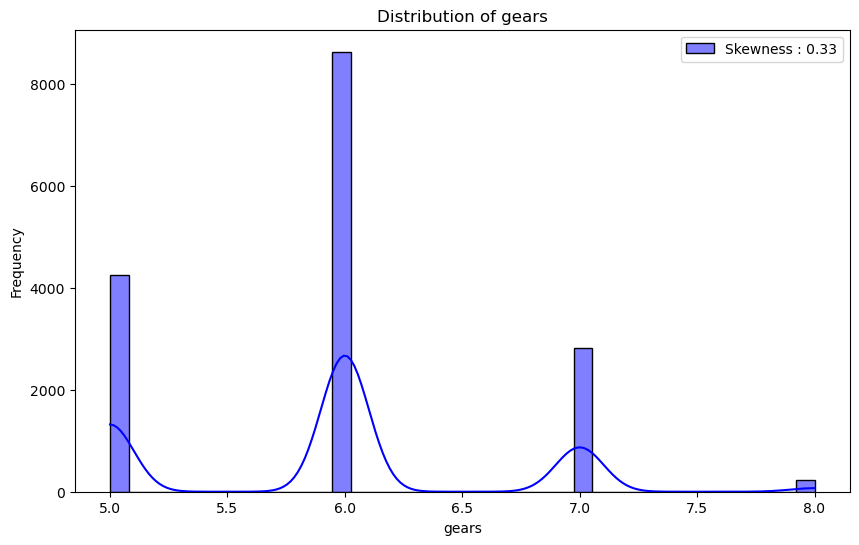

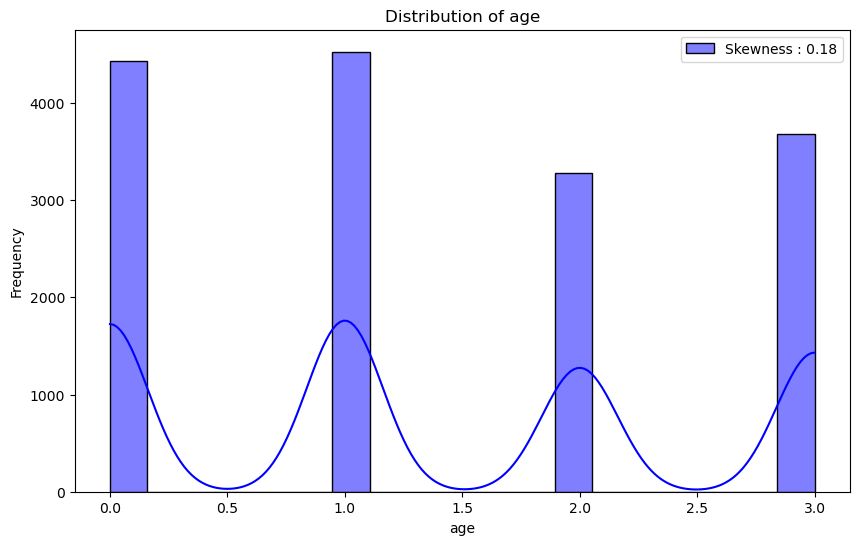

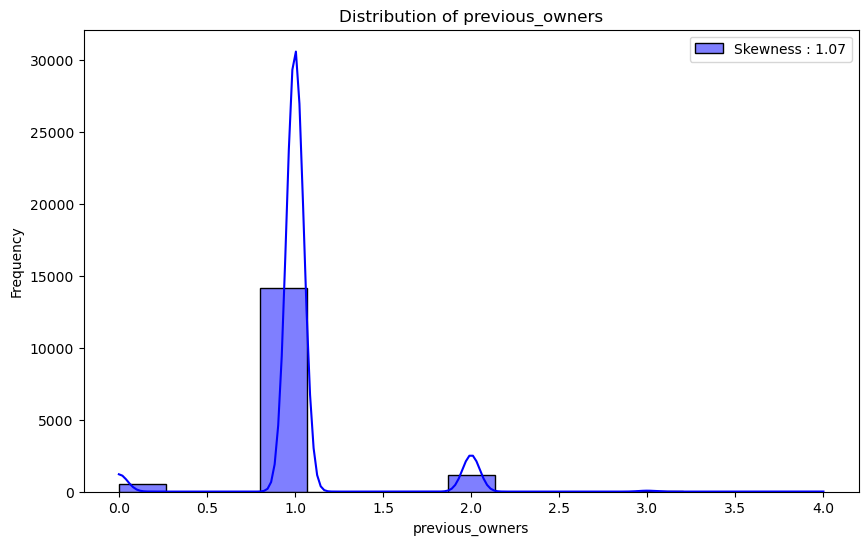

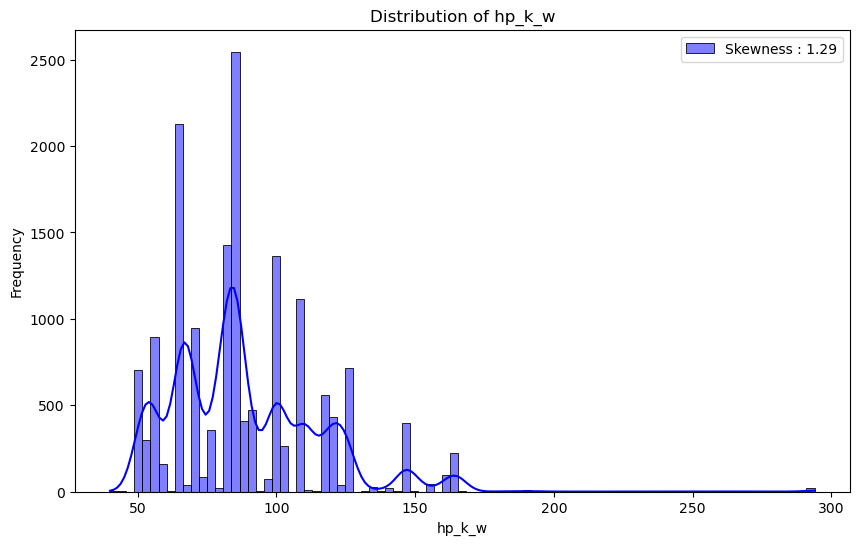

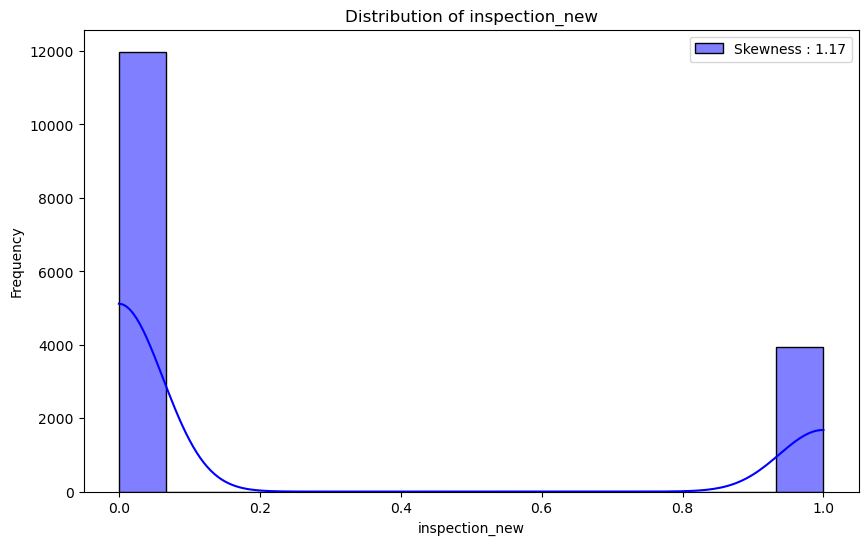

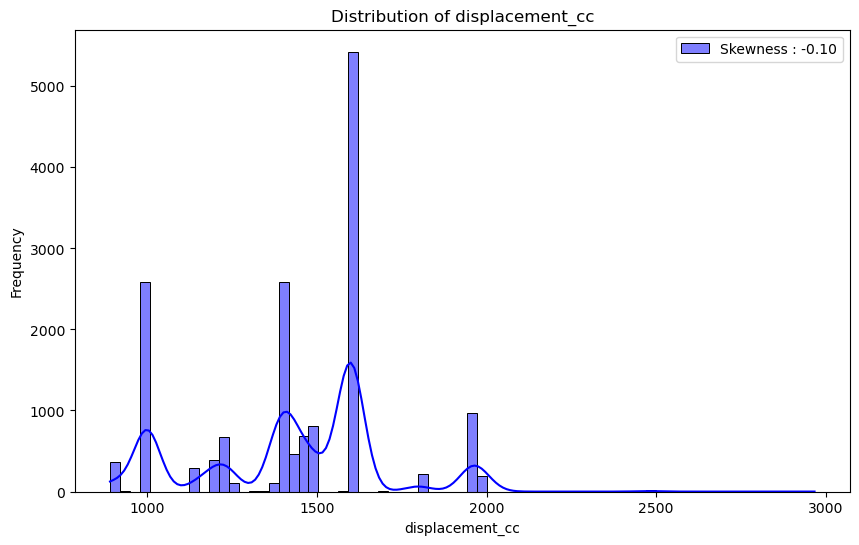

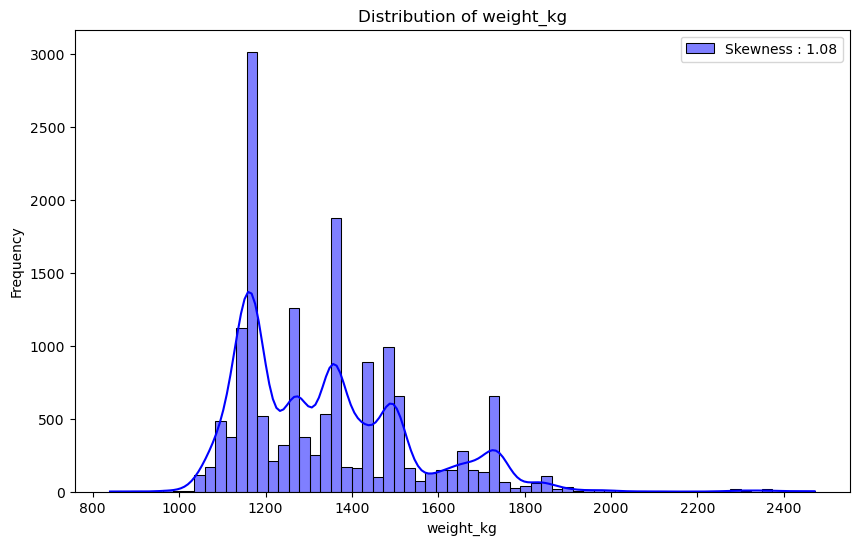

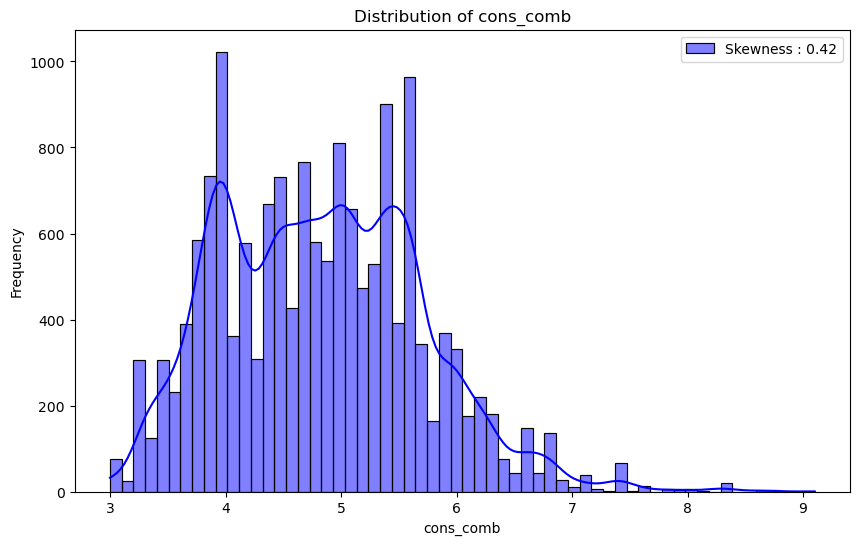

In [64]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
     
    g = sns.histplot(df[col], color="b", kde=True, label=f"Skewness : {df[col].skew():.2f}")
    
    plt.legend(loc="best")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [65]:
import plotly.graph_objects as go

# Assuming df_filtered is your DataFrame after dropping "CO2 Emissions(g/km)"
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    # Step 1: Binning the data with qcut and ensuring no duplicate bins
    df[f"{col}_bin"] = pd.qcut(df[col], q=4, duplicates='drop')
    
    # Convert Interval objects to strings for Plotly compatibility
    df[f"{col}_bin_str"] = df[f"{col}_bin"].astype(str)
    
    # Step 2: Calculating proportions
    bin_counts = df[f"{col}_bin_str"].value_counts(normalize=True)
    
    # Step 3: Plotting with Plotly
    fig = go.Figure(data=[go.Pie(labels=bin_counts.index, values=bin_counts.values, title=f"Distribution of {col}")])
    
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

In [ ]:
sns.pairplot(df, kind = "reg", diag_kind = "hist", diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}},
             corner=True)

plt.show()

In [ ]:
corr=df.corr(numeric_only=True)
corr

In [ ]:
def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color

numeric_df = df.select_dtypes(include=[np.number])

numeric_df.corr().style.applymap(color_correlation1)



In [ ]:
def color_red(val):
    if val > 0.60 and val < 0.99:
        color = 'red'
    elif val>=1:
        color = "yellowgreen"
    else:
        color = 'white'
    return f'background-color: {color}'
pd.DataFrame(corr).style.applymap(color_red)

In [ ]:
corr_values = numeric_df.corr()["price"].sort_values()
colors = plt.cm.viridis(np.linspace(0, 1, len(corr_values)))

ax = corr_values.plot.barh(color=colors)
for index, value in enumerate(corr_values):
    plt.text(value, index, "{:.2f}".format(value))

plt.show()

In [ ]:
R2_score = corr**2 

In [ ]:
def color_red(val):
    if val > 0.50 and val < 0.99:
        color = 'red'
    elif val>=1:
        color = "yellowgreen"
    else:
        color = 'white'
    return f'background-color: {color}'
pd.DataFrame.corr(R2_score).style.applymap(color_red)

In [ ]:
corr_values = pd.DataFrame.corr(R2_score)["price"].sort_values()
colors = plt.cm.viridis(np.linspace(0, 1, len(corr_values)))

ax = corr_values.plot.barh(color=colors)
for index, value in enumerate(corr_values):
    plt.text(value, index, "{:.2f}".format(value))

plt.show()

## "Conclusion in Exploratory Data Analysis (EDA)"

Since each of these values is close to +1, we can say that the distributions are slightly to moderately right-skewed. This may necessitate the application of some data transformations or normalization techniques during the data analysis and modeling process.

In [ ]:
!pip install summarytools

In [ ]:
from summarytools import dfSummary
dfSummary(df)

In [ ]:
!pip install ydata-profiling
    

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
pr_df = ProfileReport(df)
pr_df

 # <font color='green'> <b>Multiple Linear Regression Model</b><font color='black'>

In [ ]:
sns.jointplot(y=df["price"], x=df["km"],  kind='reg', color="yellowgreen" );

In [ ]:
sns.jointplot(y=df["price"], x=df["km"], kind='reg', color="green");

In [ ]:
sns.jointplot(y=df["price"], x=df["gears"], kind='reg', color="violet");

In [ ]:
sns.jointplot(y=df["price"], x=df["previous_owners"],  kind='reg', color="orange");

In [ ]:
sns.jointplot(y=df["price"], x=df["age"],  kind='reg', color="darkblue");

In [ ]:
sns.jointplot(y=df["price"], x=df["inspection_new"],  kind='reg',  color="darkred");

In [ ]:
sns.jointplot(y=df["price"], x=df["displacement_cc"],  kind='reg', color="olive");

In [ ]:
sns.jointplot(y=df["price"], x=df["weight_kg"],  kind='reg');

In [ ]:
sns.jointplot(y=df["price"], x=df["cons_comb"],  kind='reg', color="purple");

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df

## <font color='blue'> <b>Splitting the dataset into X(independent variables) and y (dependent variable)</b><font color='black'>

In [410]:
X = df[[""
        "displacement_cc",
        "cons_comb",
        "previous_owners",
        "gears", 
        "weight_kg",
        "km"
        "hp_k_w",
        "age"
       ]]   
y = df["price"]
print(X,y)

       displacement_cc  cons_comb  gears  weight_kg            km  hp_k_w
0               1422.0        3.8    7.0     1220.0  56013.000000    66.0
1               1798.0        5.6    7.0     1255.0  80000.000000   141.0
2               1598.0        3.8    7.0     1135.0  83450.000000    85.0
3               1422.0        3.8    6.0     1195.0  73000.000000    66.0
4               1422.0        4.1    7.0     1135.0  16200.000000    66.0
...                ...        ...    ...        ...           ...     ...
15910           1997.0        5.3    6.0     1758.0   1647.362609   147.0
15911           1798.0        7.4    7.0     1708.0   9900.000000   165.0
15912           1997.0        5.3    6.0     1734.0     15.000000   146.0
15913           1997.0        5.3    6.0     1758.0     10.000000   147.0
15914           1798.0        6.8    6.0     1685.0   1647.362609   165.0

[15915 rows x 6 columns] 0        15770
1        14500
2        14640
3        14500
4        16790
         ..

## <font color='blue'> <b>Multicollinearity</b><font color='black'>

In [411]:
def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color

numeric_df = df.select_dtypes(include=[np.number])
# Sayısal DataFrame üzerinde korelasyon hesapla ve stillendir
numeric_df.corr().style.applymap(color_correlation1)

## <font color='blue'> <b>Train | Test Split</b><font color='black'>

In [412]:
from sklearn.model_selection import train_test_split

In [413]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [414]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))


X Train features shape: (12732, 6)
y Train features shape: (12732,)
X Test features shape : (3183, 6)
Y Test features shape : (3183,)


 # <font color='green'> <b>Multiple (Polynomial )Linear Regression Model</b><font color='black'>

In [415]:
from sklearn.preprocessing import PolynomialFeatures

In [416]:
print(X,y)

       displacement_cc  cons_comb  gears  weight_kg            km  hp_k_w
0               1422.0        3.8    7.0     1220.0  56013.000000    66.0
1               1798.0        5.6    7.0     1255.0  80000.000000   141.0
2               1598.0        3.8    7.0     1135.0  83450.000000    85.0
3               1422.0        3.8    6.0     1195.0  73000.000000    66.0
4               1422.0        4.1    7.0     1135.0  16200.000000    66.0
...                ...        ...    ...        ...           ...     ...
15910           1997.0        5.3    6.0     1758.0   1647.362609   147.0
15911           1798.0        7.4    7.0     1708.0   9900.000000   165.0
15912           1997.0        5.3    6.0     1734.0     15.000000   146.0
15913           1997.0        5.3    6.0     1758.0     10.000000   147.0
15914           1798.0        6.8    6.0     1685.0   1647.362609   165.0

[15915 rows x 6 columns] 0        15770
1        14500
2        14640
3        14500
4        16790
         ..

In [417]:
poly_conv = PolynomialFeatures(degree=3, include_bias=False)

In [418]:
poly_conv.fit(X)

PolynomialFeatures(degree=3, include_bias=False)

In [419]:
poly_features = poly_conv.transform(X)  

In [420]:
poly_features.shape 

(15915, 83)

In [421]:
X.shape

(15915, 6)

In [422]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

## <font color='blue'> <b>Training the Model</b><font color='black'>

In [423]:
from sklearn.linear_model import LinearRegression

In [424]:
model_poly = LinearRegression()

In [425]:
model_poly.fit(X_train, y_train)

LinearRegression()

## <font color='blue'> <b>Predicting Test Data</b><font color='black'>

In [426]:
y_pred = model_poly.predict(X_test)

In [427]:
my_dict = {"Actual":y_test, "pred":y_pred, "residual": y_test - y_pred }
compare = pd.DataFrame(my_dict)
compare.head(20)

Actual          pred     residual
12887   26379  24648.925378  1730.074622
8140    18990  15054.678496  3935.321504
6835    12490  17218.234708 -4728.234708
15439   32975  31279.654311  1695.345689
1213    15888  13456.367853  2431.632147
13187   15480  16039.231911  -559.231911
1034    20500  20821.258276  -321.258276
2864    16760  14943.329795  1816.670205
7061    18990  19665.573133  -675.573133
14983   27000  29909.733164 -2909.733164
9199     8500  10853.632143 -2353.632143
9626     9190  10759.910745 -1569.910745
169     17500  16777.052740   722.947260
6119    10490  11349.073425  -859.073425
4791    21480  18470.750260  3009.249740
7655    28790  22796.306872  5993.693128
251     16990  18949.831471 -1959.831471
13938    8990   7746.119505  1243.880495
4819    21449  20477.728861   971.271139
4209    18470  18225.620704   244.379296

In [428]:
compare['residual'].sum()


98097.30970990643

In [429]:
df

make_model body_type  price               vat            km  \
0             Audi A1    Sedans  15770    VAT deductible  56013.000000   
1             Audi A1    Sedans  14500  Price negotiable  80000.000000   
2             Audi A1    Sedans  14640    VAT deductible  83450.000000   
3             Audi A1    Sedans  14500    VAT deductible  73000.000000   
4             Audi A1    Sedans  16790    VAT deductible  16200.000000   
...               ...       ...    ...               ...           ...   
15910  Renault Espace       Van  39950    VAT deductible   1647.362609   
15911  Renault Espace       Van  39885    VAT deductible   9900.000000   
15912  Renault Espace       Van  39875    VAT deductible     15.000000   
15913  Renault Espace       Van  39700    VAT deductible     10.000000   
15914  Renault Espace       Van  40999    VAT deductible   1647.362609   

                 type     fuel  gears  \
0                Used   Diesel    7.0   
1                Used  Benzine    7.0   
2                Used   Diesel    7.0   
3                Used   Diesel    6.0   
4                Used   Diesel    7.0   
...               ...      ...    ...   
15910             New   Diesel    6.0   
15911            Used  Benzine    7.0   
15912  Pre-registered   Diesel    6.0   
15913  Pre-registered   Diesel    6.0   
15914   Demonstration  Benzine    6.0   

                                     comfort_convenience  \
0      Air conditioning,Armrest,Automatic climate con...   
1      Air conditioning,Automatic climate control,Hil...   
2      Air conditioning,Cruise control,Electrical sid...   
3      Air suspension,Armrest,Auxiliary heating,Elect...   
4      Air conditioning,Armrest,Automatic climate con...   
...                                                  ...   
15910  Air conditioning,Automatic climate control,Cru...   
15911  Air conditioning,Automatic climate control,Cru...   
15912  Air conditioning,Armrest,Automatic climate con...   
15913  Air conditioning,Automatic climate control,Cru...   
15914  Air conditioning,Automatic climate control,Cru...   

                                     entertainment_media  \
0      Bluetooth,Hands-free equipment,On-board comput...   
1      Bluetooth,Hands-free equipment,On-board comput...   
2                                  MP3,On-board computer   
3      Bluetooth,CD player,Hands-free equipment,MP3,O...   
4      Bluetooth,CD player,Hands-free equipment,MP3,O...   
...                                                  ...   
15910  Bluetooth,Digital radio,Hands-free equipment,O...   
15911  Bluetooth,Digital radio,Hands-free equipment,R...   
15912  Bluetooth,Hands-free equipment,On-board comput...   
15913                  Bluetooth,Digital radio,Radio,USB   
15914                                                USB   

                                                  extras  \
0         Alloy wheels,Catalytic Converter,Voice Control   
1      Alloy wheels,Sport seats,Sport suspension,Voic...   
2                             Alloy wheels,Voice Control   
3                 Alloy wheels,Sport seats,Voice Control   
4      Alloy wheels,Sport package,Sport suspension,Vo...   
...                                                  ...   
15910                          Alloy wheels,Touch screen   
15911            Alloy wheels,Touch screen,Voice Control   
15912                                       Alloy wheels   
15913                          Alloy wheels,Touch screen   
15914                          Alloy wheels,Touch screen   

                                         safety_security  age  \
0      ABS,Central door lock,Daytime running lights,D...  3.0   
1      ABS,Central door lock,Central door lock with r...  2.0   
2      ABS,Central door lock,Daytime running lights,D...  3.0   
3      ABS,Alarm system,Central door lock with remote...  3.0   
4      ABS,Central door lock,Driver-side airbag,Elect...  3.0   
...                                                  ...  ...   
15910  ABS,

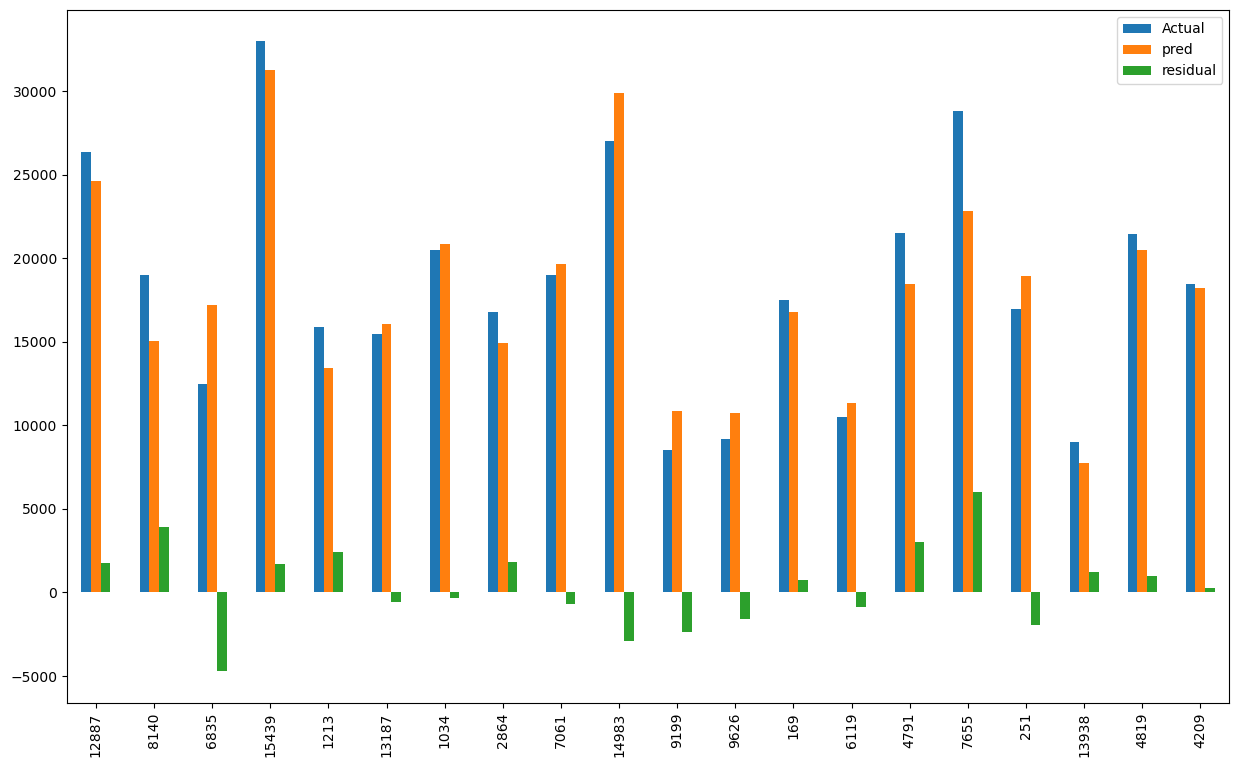

In [430]:
compare.head(20).plot(kind ="bar", figsize =(15,9))
plt.show();

## <font color='blue'> <b>Polynomial Coefficients </b><font color='black'>

In [431]:
model_poly.coef_

array([-1.72307645e+02, -9.58442278e+00, -1.14205637e-01, -1.50127220e+02,
       -1.93296602e-02,  1.35190404e+01,  5.59159895e-02, -4.87491423e+00,
        6.48004248e+00,  5.28586029e-02,  4.66269093e-04,  8.38041039e-01,
        5.91059324e+00, -6.15929611e+00,  2.46177734e-01,  6.15139253e-02,
        8.26913643e+01,  4.63673701e-02, -1.57944525e+01, -1.02079020e-02,
        3.84616334e+01,  8.24127498e-02,  6.12745207e-05,  9.95130433e-01,
       -1.65339647e-06, -9.34361527e-03, -1.39891409e+01, -2.68694113e-05,
       -1.73185350e-03,  1.48093665e-02, -5.33792031e-05,  8.93557246e-08,
        6.18868550e-04, -8.80121151e-01,  5.81075544e-01,  2.08019973e-02,
       -3.54809925e-05, -1.25079731e-01, -1.95630238e+00,  6.69634377e-03,
       -3.77650077e-05, -3.92777170e-01, -9.98415352e-06, -1.85052956e-07,
       -5.03372668e-05, -1.42193812e-10, -1.00923243e-06,  1.33564639e-03,
        3.81680558e+02, -1.72871230e+02, -2.79011525e+00,  7.99739166e-04,
       -4.20058358e+00, -

## <font color='blue'> <b>Evaluation on the Test Set</b><font color='black'> 

In [432]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [433]:
y_pred = model_poly.predict(X_test)

In [434]:

def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [435]:
eval_metric(y_test, y_pred) 

Model testing performance: 
---------------------------
R2_score 	: 0.5680404824358559
MAE 		: 2326.285738080688
MSE 		: 23311810.03845929
RMSE 		: 4828.230528719532


In [436]:
y_train_pred = model_poly.predict(X_train)  

In [437]:
eval_metric(y_train, y_train_pred) 

Model testing performance: 
---------------------------
R2_score 	: 0.8211005056941595
MAE 		: 2279.8915112893587
MSE 		: 9769788.645733746
RMSE 		: 3125.6661123244985


In [438]:
def poly(d):   # degree derecesi içine ne yazarsam ona göre çözüm oluşturacak
    
    train_rmse_errors = []   # trains rmse değerlerin toplayacak
    test_rmse_errors = []    # test rmse değerlerin toplayacak
    number_of_features = []  # derece arttıkça feature sayısının kaça çıktığnı göreceğiz
    
    for i in range(1, d):  # 1 den kaçıncı dereceye kadar istiyorsak ona göre yazacağız
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True) 
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "number of features":number_of_features}, 
                        index=range(1,d))

In [439]:
poly(5)

train_rmse_errors  test_rmse_errors  number of features
1        3955.577333       3845.676232                   6
2        3359.857379       3399.923072                  27
3        3167.437811       3164.109878                  83
4        3308.086298       3342.041370                 209

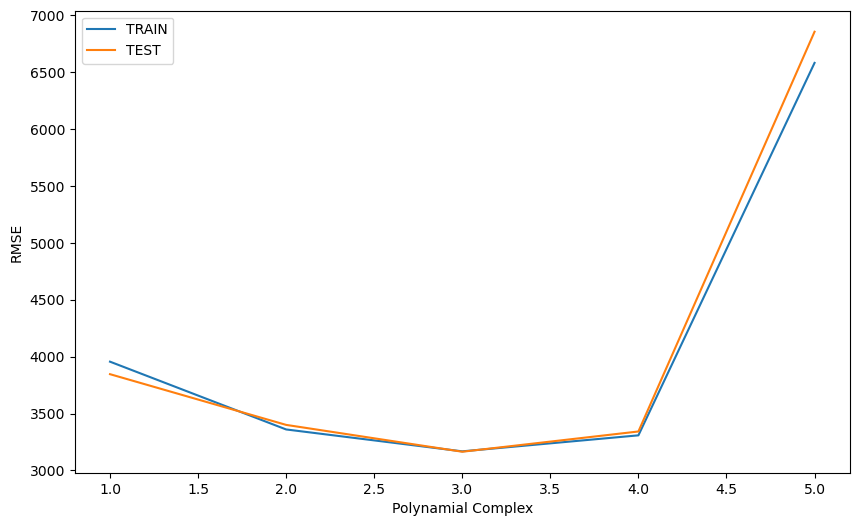

In [440]:

plt.plot(range(1,6), poly(6)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,6), poly(6)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

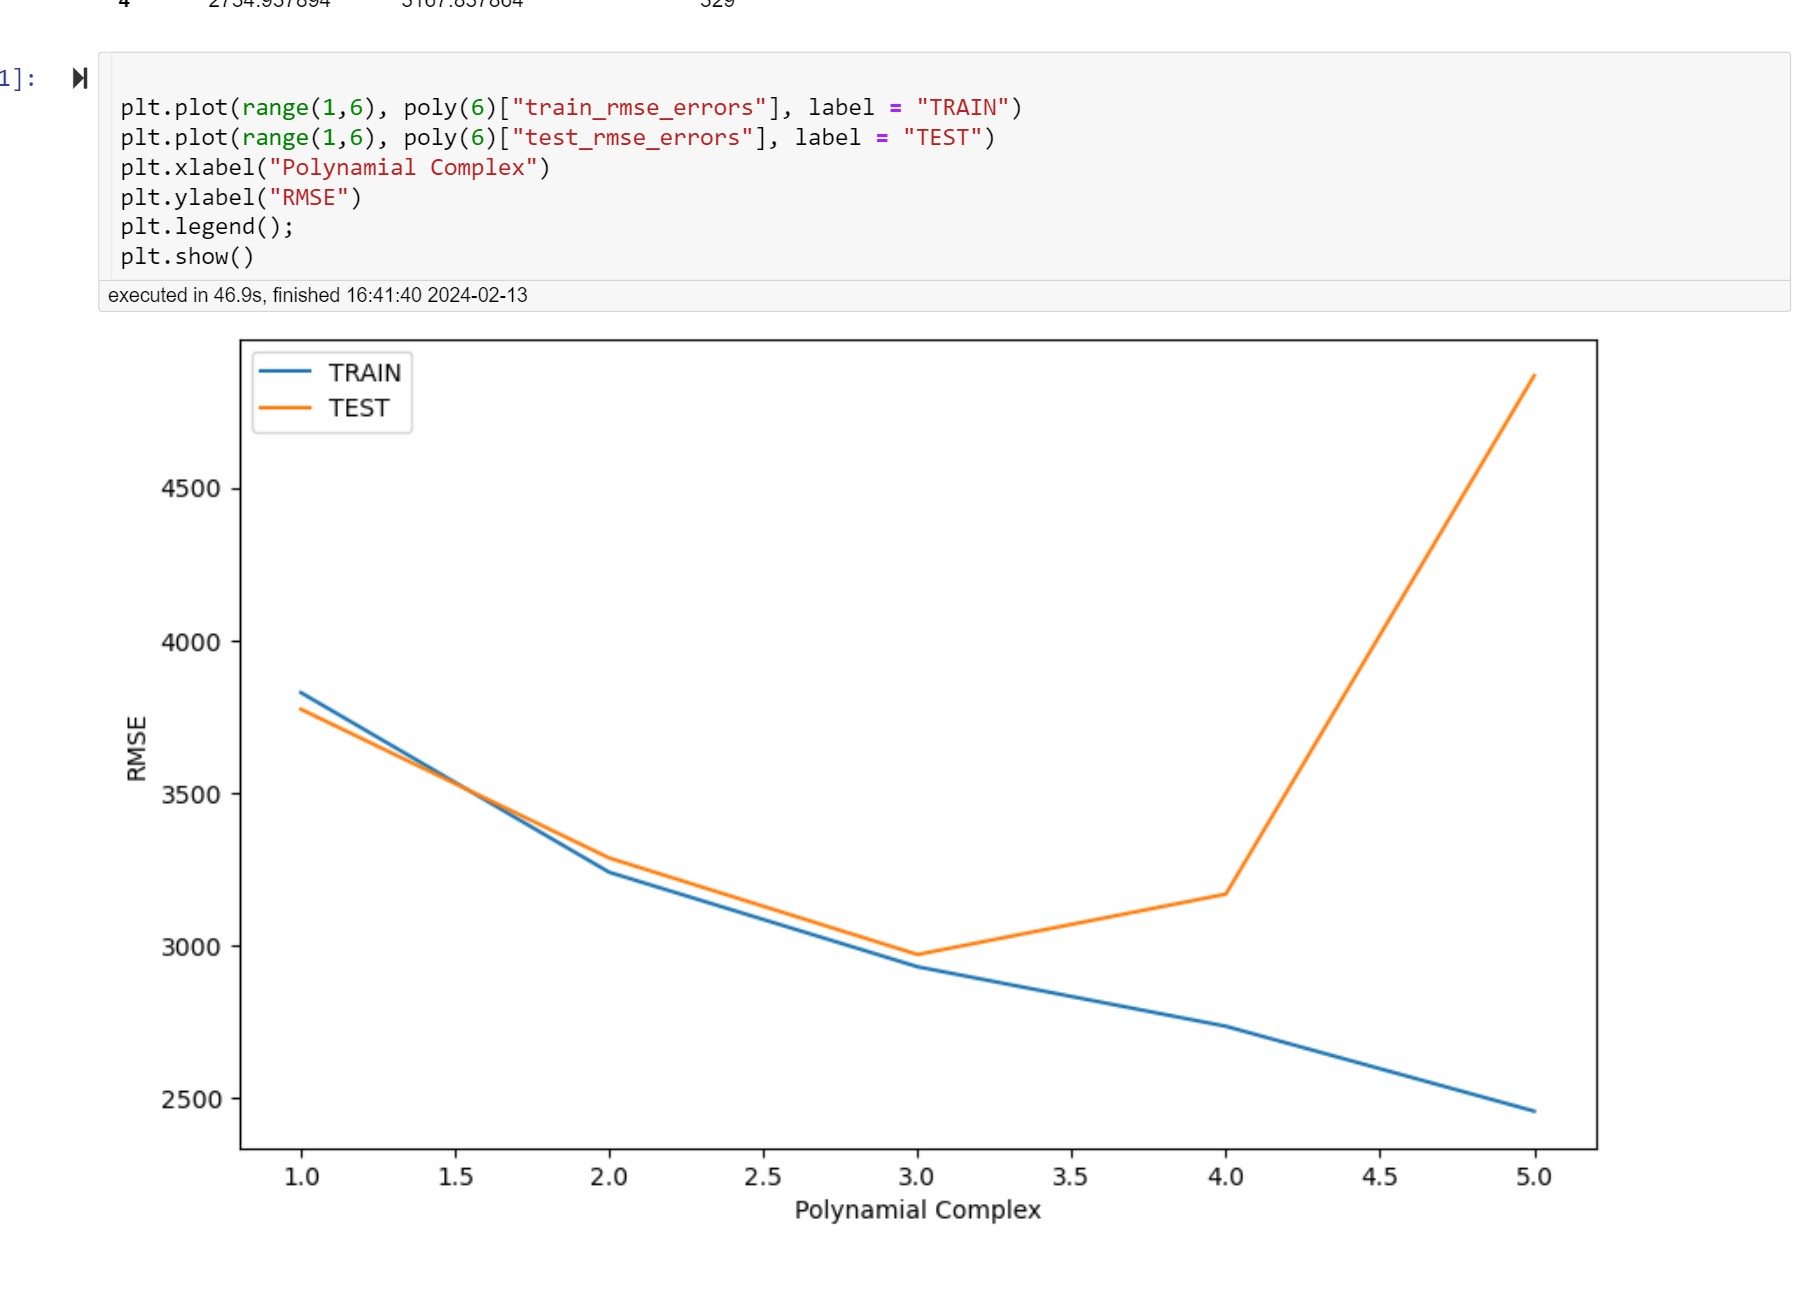

## <font color='blue'> <b> Scaling the Data</b><font color='black'> 

In [441]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [442]:
scaler = StandardScaler()

In [443]:
scaler.fit(X_train)

StandardScaler()

In [444]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-1.92665275,  0.19448875, -1.33343697, ..., -0.44064523,
        -0.63441044, -0.60402351],
       [-1.56068681, -0.03556939, -1.33343697, ..., -0.44515793,
        -0.67495616, -0.2449543 ],
       [-0.11494016, -0.3806566 , -1.33343697, ...,  0.3331812 ,
         0.3001076 , -0.41601103],
       ...,
       [-0.02797795, -0.95580194,  1.50771766, ..., -0.41741245,
        -0.52735689, -0.51241156],
       [ 2.05549153,  0.53957596,  0.08714035, ..., -0.44439159,
        -0.59512254,  1.85324258],
       [-0.11131673,  0.65460503,  0.08714035, ..., -0.29585408,
        -0.08643347, -0.11020335]])

In [445]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.60974488, -0.03556939,  0.08714035, ..., -0.43813787,
        -0.53671213,  0.07101602],
       [-1.56068681,  0.07945968, -1.33343697, ..., -0.44519868,
        -0.68252674, -0.51241156],
       [-1.56431023,  0.07945968, -1.33343697, ..., -0.43520181,
        -0.5655852 , -0.37399711],
       ...,
       [-0.11131673,  0.99969223,  0.08714035, ..., -0.44511246,
        -0.66494618,  0.34205243],
       [-0.02797795, -0.95580194,  1.50771766, ..., -0.44520094,
        -0.68366833, -0.51241156],
       [ 0.24740236,  0.53957596,  0.08714035, ..., -0.44520105,
        -0.68394256,  0.34205243]])

In [446]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
mean -0.0 -0.0  0.0 -0.0  0.0  0.0 -0.0  0.0  0.0  0.0  0.0 -0.0 -0.0  0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

       14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
mean -0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0  0.0  0.0 -0.0 -0.0  0.0  0.0  0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

       28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
mean -0.0 -0.0  0.0 -0.0  0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0  0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

       42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
mean -0.0  0.0 -0.0 -0.0  0.0  0.0  0.0  0.0  0.0 -0.0 -0.0 -0.0  0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

       56   57   58   59   60   61   62   63   64   65   66   67   68   69  \
mean -0.0  0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

       70   71   72   73   74   75   76   77   78   79   80   81   82  
mean  0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0  0.0  0.0 -0.0 -0.0  0.0 -0.0  
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [447]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round().T

mean  std
0   -0.0  1.0
1    0.0  1.0
2   -0.0  1.0
3   -0.0  1.0
4   -0.0  1.0
..   ...  ...
78  -0.0  1.0
79  -0.0  1.0
80  -0.0  1.0
81  -0.0  1.0
82  -0.0  1.0

[83 rows x 2 columns]

In [448]:
#normscaler = MinMaxScaler()

In [449]:
#normscaler.fit(X_train)

In [450]:
#X_train_normscaled = normscaler.transform(X_train)
#X_train_normscaled

In [451]:
#X_test_normscaled = normscaler.transform(X_test)
#X_test_normscaled

In [452]:
#pd.DataFrame(X_train_normscaled).agg(["mean", "std"]).round()

In [453]:
#pd.DataFrame(X_test_normscaled).agg(["mean", "std"]).round()

# <font color='green'> <b> Linear Regression Model</b><font color='black'>

In [454]:
from sklearn.linear_model import LinearRegression

In [455]:
lm = LinearRegression()

In [456]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [457]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [458]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i): 
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [459]:
plm = train_val(y_train, y_train_pred, y_test, y_pred, "linear") 
plm 

linear_train   linear_test
R2    8.288318e-01  7.555550e-01
mae   2.215235e+03  2.247858e+03
mse   9.347580e+06  1.319210e+07
rmse  3.057381e+03  3.632094e+03

In [460]:
def convert_and_round_df(df):
    for column in df.columns:
        try:
            df[column] = df[column].apply(lambda x: round(float(x), 2))
        except:
            continue
    return df

df = convert_and_round_df(plm)
df


linear_train  linear_test
R2            0.83         0.76
mae        2215.23      2247.86
mse     9347580.01  13192103.24
rmse       3057.38      3632.09

## <font color='blue'> <b> Multicolinearty</b><font color='black'> 

In [461]:
def color_red(val):
   
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val>=1:
        color = "blue"
    else:
        color = 'black'
    return f'color: {color}'

In [462]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

In [463]:
def color_red(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val>=1:
        color = "blue"
    else:
        color = 'white'
    return f'background-color: {color}'
pd.DataFrame(poly_features).corr().style.applymap(color_red)

## <font color='blue'> <b>Cross Validate</b><font color='black'>

In [464]:
from sklearn.model_selection import cross_validate, cross_val_score

In [465]:
import sklearn.metrics
for i in dir(sklearn.metrics):
    print(i)

ConfusionMatrixDisplay
DetCurveDisplay
DistanceMetric
PrecisionRecallDisplay
PredictionErrorDisplay
RocCurveDisplay
SCORERS
__all__
__builtins__
__cached__
__doc__
__file__
__loader__
__name__
__package__
__path__
__spec__
_base
_classification
_dist_metrics
_pairwise_distances_reduction
_pairwise_fast
_plot
_ranking
_regression
_scorer
accuracy_score
adjusted_mutual_info_score
adjusted_rand_score
auc
average_precision_score
balanced_accuracy_score
brier_score_loss
calinski_harabasz_score
check_scoring
class_likelihood_ratios
classification_report
cluster
cohen_kappa_score
completeness_score
confusion_matrix
consensus_score
coverage_error
d2_absolute_error_score
d2_pinball_score
d2_tweedie_score
davies_bouldin_score
dcg_score
det_curve
euclidean_distances
explained_variance_score
f1_score
fbeta_score
fowlkes_mallows_score
get_scorer
get_scorer_names
hamming_loss
hinge_loss
homogeneity_completeness_v_measure
homogeneity_score
jaccard_score
label_ranking_average_precision_score
label_ran

In [466]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 5)

In [467]:
pd.DataFrame(scores, index = range(1,6))

fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
1  1.236410    0.002991  0.801008                  -2287.349358   
2  1.136315    0.003006  0.831190                  -2242.047879   
3  1.257493    0.003011  0.815695                  -2185.132271   
4  1.126523    0.002999  0.823194                  -2256.643995   
5  0.619046    0.003199  0.816143                  -2227.550457   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                -1.069344e+07                      -3270.083114  
2                -9.489090e+06                      -3080.436616  
3                -9.381178e+06                      -3062.870851  
4                -9.949223e+06                      -3154.238831  
5                -1.026912e+07                      -3204.547120

In [468]:
cv_df = pd.DataFrame(scores, index=range(1, 6)).add_prefix("cv_")
cv_df

cv_fit_time  cv_score_time  cv_test_r2  cv_test_neg_mean_absolute_error  \
1     1.236410       0.002991    0.801008                     -2287.349358   
2     1.136315       0.003006    0.831190                     -2242.047879   
3     1.257493       0.003011    0.815695                     -2185.132271   
4     1.126523       0.002999    0.823194                     -2256.643995   
5     0.619046       0.003199    0.816143                     -2227.550457   

   cv_test_neg_mean_squared_error  cv_test_neg_root_mean_squared_error  
1                   -1.069344e+07                         -3270.083114  
2                   -9.489090e+06                         -3080.436616  
3                   -9.381178e+06                         -3062.870851  
4                   -9.949223e+06                         -3154.238831  
5                   -1.026912e+07                         -3204.547120

In [469]:
cv_df= cv_df.iloc[:, 2:].mean()
cv_df


cv_test_r2                             8.174461e-01
cv_test_neg_mean_absolute_error       -2.239745e+03
cv_test_neg_mean_squared_error        -9.956411e+06
cv_test_neg_root_mean_squared_error   -3.154435e+03
dtype: float64

In [470]:
def convert_and_round_df(df):
    for column in df.columns:
        try:
            df[column] = df[column].apply(lambda x: round(float(x), 2))
        except:
            continue
    return df



In [471]:
a=train_val(y_train, y_train_pred, y_test, y_pred, "linear")
a= convert_and_round_df(a)
a

linear_train  linear_test
R2            0.83         0.76
mae        2215.23      2247.86
mse     9347580.01  13192103.24
rmse       3057.38      3632.09

In [472]:

lm.coef_

array([  -3162.67799266,   -4012.99196787,  -91391.5155002 ,
        -60136.54915551,  -16704.49213138,  -28759.28027397,
        -25464.7995946 ,    4629.85170698,  -36051.35426332,
         12108.9159953 ,   25189.80917906,   95393.77515132,
        -43426.00903698,   -5553.09997754,   42482.05787851,
          6685.6000725 ,   51728.79324691,  173666.72727015,
          8840.03269174,   23355.16490882,   40207.02027576,
         70732.61357468,   -4212.49407882,   44855.82771081,
         -6144.70171887,  -11641.1911801 , -101994.339291  ,
        -41376.39426618,   -1703.04917567,  103763.18414172,
        -26546.9875086 ,    8902.72506263,   78548.590833  ,
        -16268.64583721,    4344.69227076,   48827.60161685,
         -9244.23791807,  -43940.90472581,  -17168.73836263,
         44489.74271817,  -15111.23536714, -181171.88038034,
        -17611.18961863,  -12562.29165939,  -49495.58260828,
          -672.19694185,   -5620.85337691,   15472.04776924,
         37218.11374559,

In [473]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

lm_coef
0   -3162.677993
1   -4012.991968
2  -91391.515500
3  -60136.549156
4  -16704.492131
..           ...
78  15294.033023
79  -3304.043915
80   3426.836154
81   5953.566981
82 -27616.198388

[83 rows x 1 columns]

## <font color='blue'> <b>Choosing best alpha value with Cross Validation (CV) (Rigde)</b><font color='black'>

In [474]:
from sklearn.linear_model import Ridge

In [475]:
from sklearn.linear_model import RidgeCV

In [476]:
alpha_space = np.linspace(0.001, 0.01, 100)
alpha_space


array([0.001     , 0.00109091, 0.00118182, 0.00127273, 0.00136364,
       0.00145455, 0.00154545, 0.00163636, 0.00172727, 0.00181818,
       0.00190909, 0.002     , 0.00209091, 0.00218182, 0.00227273,
       0.00236364, 0.00245455, 0.00254545, 0.00263636, 0.00272727,
       0.00281818, 0.00290909, 0.003     , 0.00309091, 0.00318182,
       0.00327273, 0.00336364, 0.00345455, 0.00354545, 0.00363636,
       0.00372727, 0.00381818, 0.00390909, 0.004     , 0.00409091,
       0.00418182, 0.00427273, 0.00436364, 0.00445455, 0.00454545,
       0.00463636, 0.00472727, 0.00481818, 0.00490909, 0.005     ,
       0.00509091, 0.00518182, 0.00527273, 0.00536364, 0.00545455,
       0.00554545, 0.00563636, 0.00572727, 0.00581818, 0.00590909,
       0.006     , 0.00609091, 0.00618182, 0.00627273, 0.00636364,
       0.00645455, 0.00654545, 0.00663636, 0.00672727, 0.00681818,
       0.00690909, 0.007     , 0.00709091, 0.00718182, 0.00727273,
       0.00736364, 0.00745455, 0.00754545, 0.00763636, 0.00772

In [477]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv= 5, scoring = "neg_root_mean_squared_error")

In [478]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.001     , 0.00109091, 0.00118182, 0.00127273, 0.00136364,
       0.00145455, 0.00154545, 0.00163636, 0.00172727, 0.00181818,
       0.00190909, 0.002     , 0.00209091, 0.00218182, 0.00227273,
       0.00236364, 0.00245455, 0.00254545, 0.00263636, 0.00272727,
       0.00281818, 0.00290909, 0.003     , 0.00309091, 0.00318182,
       0.00327273, 0.00336364, 0.00345455, 0.00354545, 0.00363636,
       0.00372727, 0....
       0.00736364, 0.00745455, 0.00754545, 0.00763636, 0.00772727,
       0.00781818, 0.00790909, 0.008     , 0.00809091, 0.00818182,
       0.00827273, 0.00836364, 0.00845455, 0.00854545, 0.00863636,
       0.00872727, 0.00881818, 0.00890909, 0.009     , 0.00909091,
       0.00918182, 0.00927273, 0.00936364, 0.00945455, 0.00954545,
       0.00963636, 0.00972727, 0.00981818, 0.00990909, 0.01      ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [479]:
ridge_cv_model.alpha_

0.001

In [480]:
ridge_cv_model.best_score_

-3155.9016310350003

In [481]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [482]:
rcs =  convert_and_round_df(train_val(y_train, y_train_pred, y_test, y_pred, "rigde_cv"))
rcs

rigde_cv_train  rigde_cv_test
R2              0.83           0.74
mae          2214.82        2250.27
mse       9348258.37    13936399.26
rmse         3057.49        3733.15

In [483]:
convert_and_round_df(pd.concat([ rcs], axis = 1))

rigde_cv_train  rigde_cv_test
R2              0.83           0.74
mae          2214.82        2250.27
mse       9348258.37    13936399.26
rmse         3057.49        3733.15

In [484]:
ridge_cv_model.coef_

array([  -8254.56419958,   -6814.75556419,  -87219.22826509,
        -60255.96925278,  -16154.33737689,  -23402.39844757,
        -19706.34832815,    8690.16725659,  -28927.32059681,
         13643.33945552,   25603.85641162,   84687.59756672,
        -42617.49820375,   -1065.33778507,   44065.76031031,
          6738.98868307,   45517.92767613,  161292.84120628,
          9335.81273888,   22106.33970755,   35383.66084302,
         70016.82925868,   -4121.39543743,   41935.83956429,
         -6248.35634225,  -11953.4404262 ,  -95230.20244776,
        -41538.29651214,   -3365.80811677,   99158.68003437,
        -27267.04660691,    8203.16005764,   79474.56386713,
        -16942.42042539,    1308.12238974,   47674.61014972,
         -9330.44524672,  -39275.59710272,  -18930.35389521,
         42393.21598183,  -14742.31093719, -172421.64546058,
        -16835.73446071,  -12930.97557954,  -47790.07626592,
          -593.68457381,   -4696.4462792 ,   12563.43559036,
         37215.44926919,

In [485]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns = ["ridge_cv_model.coef_0.02"])

In [486]:
convert_and_round_df(pd.concat([lm_df, rcm_df], axis = 1))

lm_coef  ridge_cv_model.coef_0.02
0   -3162.68                  -8254.56
1   -4012.99                  -6814.76
2  -91391.52                 -87219.23
3  -60136.55                 -60255.97
4  -16704.49                 -16154.34
..       ...                       ...
78  15294.03                  14313.91
79  -3304.04                  -3303.03
80   3426.84                   3348.51
81   5953.57                   5649.27
82 -27616.20                 -25833.74

[83 rows x 2 columns]

 # <font color='blue'> <b>Lasso</b><font color='black'>

In [487]:
from sklearn.linear_model import Lasso, LassoCV

In [488]:
lasso_model = Lasso(alpha=1.0, random_state = 42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(random_state=42)

In [489]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [490]:
lss = convert_and_round_df(train_val(y_train, y_train_pred, y_test, y_pred, "lasso"))
lss

lasso_train   lasso_test
R2           0.80         0.81
mae       2418.93      2378.07
mse   10706120.27  10083011.52
rmse      3272.02      3175.38

In [491]:
convert_and_round_df(pd.concat([ rcs, lss], axis = 1))

rigde_cv_train  rigde_cv_test  lasso_train   lasso_test
R2              0.83           0.74         0.80         0.81
mae          2214.82        2250.27      2418.93      2378.07
mse       9348258.37    13936399.26  10706120.27  10083011.52
rmse         3057.49        3733.15      3272.02      3175.38

In [492]:
model = Lasso(alpha=1.0, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 5)

In [493]:
pd.DataFrame(scores, index = range(1,6))

fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
1  11.457616    0.003251  0.790486                  -2446.043169   
2  12.034997    0.002389  0.804819                  -2442.885530   
3  11.545678    0.003212  0.795897                  -2381.073039   
4  11.272184    0.002981  0.795837                  -2481.636692   
5  11.692994    0.002990  0.799755                  -2412.710086   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                -1.125891e+07                      -3355.429409  
2                -1.097143e+07                      -3312.314402  
3                -1.038893e+07                      -3223.185568  
4                -1.148864e+07                      -3389.489509  
5                -1.118444e+07                      -3344.314962

In [494]:
scores = pd.DataFrame(scores, index = range(1,6))
scores.iloc[:,2:].mean()

test_r2                             7.973589e-01
test_neg_mean_absolute_error       -2.432870e+03
test_neg_mean_squared_error        -1.105847e+07
test_neg_root_mean_squared_error   -3.324947e+03
dtype: float64

<Axes: >

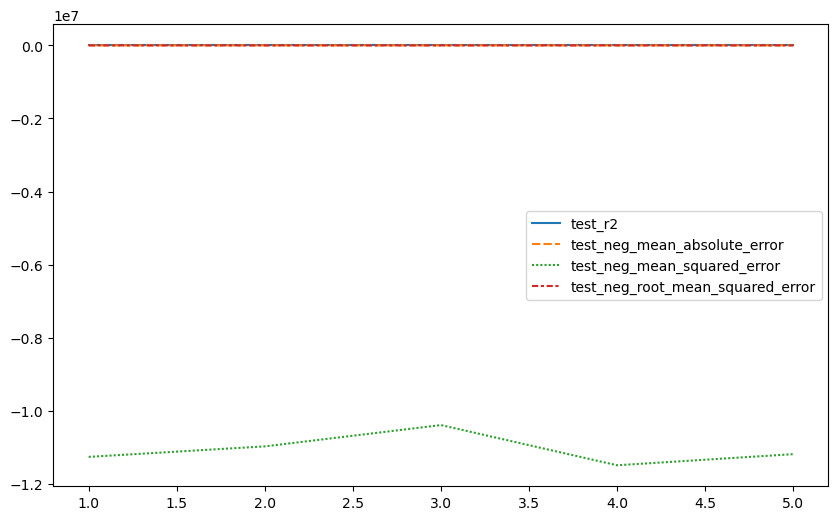

In [495]:
sns.lineplot(data=scores.iloc[:,2:])

In [496]:
lasso_model.coef_

array([ 1.92038219e+02,  3.52562624e+02, -7.27559488e+02,  2.02220759e+03,
        1.14949535e+03,  5.96458127e+03, -3.17014766e+03, -0.00000000e+00,
       -0.00000000e+00,  6.34421620e+01,  1.66113154e+02, -3.67676010e+03,
       -1.66528894e+03,  5.79505443e+02,  1.70719763e+03,  2.83723027e+02,
       -0.00000000e+00,  2.28802167e+03, -1.03526127e+03, -6.64573953e+02,
       -0.00000000e+00, -5.72372624e+02, -6.06927024e+02,  4.48458572e+03,
       -7.94263119e+02, -2.05230962e+03, -7.67351757e+03,  4.26129018e+03,
        1.17026282e+03,  1.78277013e-01, -1.44061105e+03,  3.05878334e+01,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  3.89543937e+02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.70659223e+02,
        1.13907852e+03, -3.02714726e+03,  1.66809549e+02, -3.49714617e+03,
        1.79043092e+03,  1.42362580e+03,  1.12994928e+02,  1.29935419e+03,
        2.04250735e+03, -2.84051914e+03, -2.57186762e+03, -4.50795809e+02,
        1.28859065e+03,  

In [497]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["losso_coef_alpha_1"])

In [498]:
convert_and_round_df(pd.concat([lm_df, rcm_df, lsm_df], axis=1))

lm_coef  ridge_cv_model.coef_0.02  losso_coef_alpha_1
0   -3162.68                  -8254.56              192.04
1   -4012.99                  -6814.76              352.56
2  -91391.52                 -87219.23             -727.56
3  -60136.55                 -60255.97             2022.21
4  -16704.49                 -16154.34             1149.50
..       ...                       ...                 ...
78  15294.03                  14313.91            -1081.26
79  -3304.04                  -3303.03            -3372.84
80   3426.84                   3348.51             1806.34
81   5953.57                   5649.27             2813.27
82 -27616.20                 -25833.74             2857.86

[83 rows x 3 columns]

## <font color='blue'> <b>Choosing best alpha value with Cross Validation (CV) (Lasso)</b><font color='black'> 

In [499]:
lasso_cv_model = LassoCV(alphas=alpha_space, cv = 5,  max_iter=10000, random_state = 42)

In [500]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.001     , 0.00109091, 0.00118182, 0.00127273, 0.00136364,
       0.00145455, 0.00154545, 0.00163636, 0.00172727, 0.00181818,
       0.00190909, 0.002     , 0.00209091, 0.00218182, 0.00227273,
       0.00236364, 0.00245455, 0.00254545, 0.00263636, 0.00272727,
       0.00281818, 0.00290909, 0.003     , 0.00309091, 0.00318182,
       0.00327273, 0.00336364, 0.00345455, 0.00354545, 0.00363636,
       0.00372727, 0....
       0.00736364, 0.00745455, 0.00754545, 0.00763636, 0.00772727,
       0.00781818, 0.00790909, 0.008     , 0.00809091, 0.00818182,
       0.00827273, 0.00836364, 0.00845455, 0.00854545, 0.00863636,
       0.00872727, 0.00881818, 0.00890909, 0.009     , 0.00909091,
       0.00918182, 0.00927273, 0.00936364, 0.00945455, 0.00954545,
       0.00963636, 0.00972727, 0.00981818, 0.00990909, 0.01      ]),
        cv=5, max_iter=10000, random_state=42)

In [501]:
print(lasso_cv_model.n_iter_) 

10000


In [502]:
lasso_cv_model.alpha_

0.007727272727272728

In [503]:
best_alpha = lasso_cv_model.alpha_

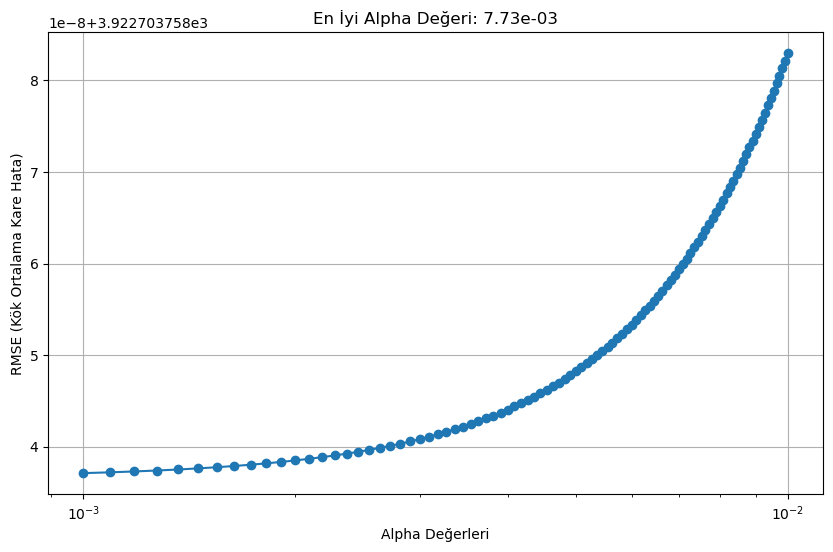

In [504]:
rmse_values = []
for alpha in alpha_space:
    lasso_model = Lasso(alpha=alpha, max_iter=100000, random_state=42)
    lasso_model.fit(X, y)
    y_pred = lasso_model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    rmse_values.append(rmse)

# Alpha değerlerini ve RMSE değerlerini görselleştirin
plt.figure(figsize=(10, 6))
plt.plot(alpha_space, rmse_values, marker='o')
plt.xscale('log')  # X eksenini logaritmik ölçekte ayarlayın
plt.xlabel('Alpha Değerleri')
plt.ylabel('RMSE (Kök Ortalama Kare Hata)')
plt.title(f'En İyi Alpha Değeri: {best_alpha:.2e}')
plt.grid()
plt.show()

In [505]:
y_pred = lasso_cv_model.predict(X_test_scaled)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [506]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

lasso_cv_train  lasso_cv_test
R2      8.138209e-01   8.078462e-01
mae     2.339749e+03   2.323786e+03
mse     1.016733e+07   1.037007e+07
rmse    3.188626e+03   3.220260e+03

In [507]:
pd.concat([ls, rcs, lss, lcs], axis=1)

NameError: name 'ls' is not defined

In [ ]:
lasso_cv_model.coef_

In [ ]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [ ]:
pd.concat([lm_df,  rcm_df, lsm_df, lcm_df], axis = 1)

# <font color='green'> <b>Final Model and Prediction</b><font color='black'>

In [ ]:
final_model = LinearRegression()
final_model.fit(X, y)

In [ ]:
final_model.coef_

In [ ]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

In [ ]:
final_model.intercept_

In [ ]:
coeff_df